In [2]:
# requirements

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import tensorflow
from tensorflow import keras

from keras.metrics import Precision,Recall,F1Score

c:\Users\prade\anaconda3\envs\giri\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:
df = pd.read_csv(r"data.csv")
df.drop(columns=["Timestamp","Email Address"],axis=1,inplace=True)

In [4]:
df.head()

,How spontaneous are you?,Do you enjoy giving or receiving surprises?\n,\nHow important is music taste compatibility to you?\n,"How open are you to trying new things (food, travel, experiences)?",How much personal space do you need in a relationship?,How emotionally expressive are you?,How important is having similar long-term goals?,What’s your preferred mode of communication?,What’s your ideal time to hang out?,What is your ideal weekend plan?
0,Balanced,Like it,Slightly important,Mostly open,Quite a bit,Very expressive,Neutral,Face to Face,Late night,Partying
1,Balanced,Like it,Important but not a deal-breaker,Sometimes open,Moderate,Balanced,Important,Calling,Evening,Watching Movies
2,Mostly planned,Neutral,"Very important, must match mine",Sometimes open,A lot,Mostly expressive,Neutral,Texting,Evening,Staying Indoors/Chilling
3,Balanced,Love it,Neutral / Okay either way,Mostly open,Moderate,Balanced,Very important,Texting,Late night,Staying Indoors/Chilling
4,Balanced,Love it,Neutral / Okay either way,Very adventurous,Quite a bit,Balanced,Important,Calling,Evening,Watching Movies


In [5]:
# well have to create a ideal profile for giving the score
# based on the score youll have to create a column with match and no_match

In [6]:
# drawback of this data is every column in categorical format

In [5]:
# creating a ideal profile to calculate the score

data = {"How spontaneous are you?":"Balanced",
        "Do you enjoy giving or receiving surprises?\n":"Like it",
        "\nHow important is music taste compatibility to you?\n":"Important but not a deal-breaker",
        "How open are you to trying new things (food, travel, experiences)?":"Mostly open",
        "How much personal space do you need in a relationship?":"Quite a bit",
        "How emotionally expressive are you?":"Balanced",
        "How important is having similar long-term goals?":"Important",
        "What’s your preferred mode of communication?":"Face to Face",
        "What’s your ideal time to hang out?":"Late night",
        "What is your ideal weekend plan?":"Outdoor Adventures"}

In [6]:
for col in df.columns:
    print("===============================")
    print(df[col].value_counts())
    print("===============================")
    # df[col].value_counts().plot(kind='bar')
    # plt.show()

How spontaneous are you?
Balanced              78
Mostly planned        23
Mostly spontaneous    18
Very spontaneous      17
Very planned          13
Name: count, dtype: int64
Do you enjoy giving or receiving surprises?\n
Love it       51
Like it       50
Neutral       38
Dislike it     6
Hate it        4
Name: count, dtype: int64
\nHow important is music taste compatibility to you?\n
Very important, must match mine     49
Important but not a deal-breaker    43
Neutral / Okay either way           38
Slightly important                  13
Doesn’t matter at all                6
Name: count, dtype: int64
How open are you to trying new things (food, travel, experiences)?
Mostly open          62
Very adventurous     38
Sometimes open       32
Slightly hesitant    12
Not open at all       4
Name: count, dtype: int64
How much personal space do you need in a relationship?
Moderate       44
A little       33
Quite a bit    26
A lot          26
Very little    20
Name: count, dtype: int64
How emo

In [7]:
def custom_score(row):
    score = 0
    for key,value in data.items():
        observation = row.get(key)
        if observation == value:
            score +=1
    return score

In [8]:
df["score"] = df.apply(custom_score,axis=1)

In [9]:
df["score"].value_counts()

score
4    36
3    30
5    24
6    17
2    16
1    13
7     9
0     3
8     1
Name: count, dtype: int64

In [10]:
df.head()

,How spontaneous are you?,Do you enjoy giving or receiving surprises?\n,\nHow important is music taste compatibility to you?\n,"How open are you to trying new things (food, travel, experiences)?",How much personal space do you need in a relationship?,How emotionally expressive are you?,How important is having similar long-term goals?,What’s your preferred mode of communication?,What’s your ideal time to hang out?,What is your ideal weekend plan?,score
0,Balanced,Like it,Slightly important,Mostly open,Quite a bit,Very expressive,Neutral,Face to Face,Late night,Partying,6
1,Balanced,Like it,Important but not a deal-breaker,Sometimes open,Moderate,Balanced,Important,Calling,Evening,Watching Movies,5
2,Mostly planned,Neutral,"Very important, must match mine",Sometimes open,A lot,Mostly expressive,Neutral,Texting,Evening,Staying Indoors/Chilling,0
3,Balanced,Love it,Neutral / Okay either way,Mostly open,Moderate,Balanced,Very important,Texting,Late night,Staying Indoors/Chilling,4
4,Balanced,Love it,Neutral / Okay either way,Very adventurous,Quite a bit,Balanced,Important,Calling,Evening,Watching Movies,4


In [11]:
df["labels"] = df["score"].apply(lambda x:"match" if x >=4 else "no_match")
# 4 is called as threshold

In [12]:
df["labels"].value_counts()

# imbalanced data
# rewrite the logic for creating labels
# upsample the data -- Experiments

labels
match       87
no_match    62
Name: count, dtype: int64

In [13]:
df

,How spontaneous are you?,Do you enjoy giving or receiving surprises?\n,\nHow important is music taste compatibility to you?\n,"How open are you to trying new things (food, travel, experiences)?",How much personal space do you need in a relationship?,How emotionally expressive are you?,How important is having similar long-term goals?,What’s your preferred mode of communication?,What’s your ideal time to hang out?,What is your ideal weekend plan?,score,labels
0,Balanced,Like it,Slightly important,Mostly open,Quite a bit,Very expressive,Neutral,Face to Face,Late night,Partying,6,match
1,Balanced,Like it,Important but not a deal-breaker,Sometimes open,Moderate,Balanced,Important,Calling,Evening,Watching Movies,5,match
2,Mostly planned,Neutral,"Very important, must match mine",Sometimes open,A lot,Mostly expressive,Neutral,Texting,Evening,Staying Indoors/Chilling,0,no_match
3,Balanced,Love it,Neutral / Okay either way,Mostly open,Moderate,Balanced,Very important,Texting,Late night,Staying Indoors/Chilling,4,match
4,Balanced,Love it,Neutral / Okay either way,Very adventurous,Quite a bit,Balanced,Important,Calling,Evening,Watching Movies,4,match
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Very spontaneous,Love it,Important but not a deal-breaker,Very adventurous,Quite a bit,Very expressive,Very important,Face to Face,Late night,Staying Indoors/Chilling,4,match
145,Balanced,Like it,"Very important, must match mine",Mostly open,Moderate,Slightly reserved,Important,Face to Face,Evening,Staying Indoors/Chilling,5,match
146,Balanced,Like it,Neutral / Okay either way,Mostly open,Quite a bit,Mostly expressive,Important,Texting,Evening,Partying,5,match
147,Very planned,Love it,Neutral / Okay either way,Very adventurous,A little,Very reserved,Very important,Calling,Evening,Partying,0,no_match


In [14]:
# Convert the categorical columns --> numbers --> Encoding

# Type of Data - Nominal Data(doesnt follow any order), Ordinal data(follows order)


df.drop(columns="score",axis=1,inplace=True)

In [15]:
for col in df.columns:
    le = LabelEncoder()
    le = le.fit(df[col])
    df[col] = le.fit_transform(df[col])

In [16]:
df

,How spontaneous are you?,Do you enjoy giving or receiving surprises?\n,\nHow important is music taste compatibility to you?\n,"How open are you to trying new things (food, travel, experiences)?",How much personal space do you need in a relationship?,How emotionally expressive are you?,How important is having similar long-term goals?,What’s your preferred mode of communication?,What’s your ideal time to hang out?,What is your ideal weekend plan?,labels
0,0,2,3,0,3,3,1,1,2,1,0
1,0,2,1,3,2,0,0,0,1,3,0
2,1,4,4,3,1,1,1,2,1,2,1
3,0,3,2,0,2,0,4,2,2,2,0
4,0,3,2,4,3,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
144,4,3,1,4,3,3,4,1,2,2,0
145,0,2,4,0,2,2,0,1,1,2,0
146,0,2,2,0,3,1,0,2,1,1,0
147,3,3,2,4,0,4,4,0,1,1,1


In [17]:
x = df.drop(columns = "labels",axis=1)
y = df["labels"]

In [18]:
x.shape

(149, 10)

In [19]:
requirements = keras.callbacks.ModelCheckpoint(
    r"C:\Users\prade\OneDrive\Desktop\model approach\weights.h5",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    save_freq="epoch")

In [20]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(10,)))
model.add(keras.layers.Dense(8,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=42),
                             ))
model.add(keras.layers.PReLU())
model.add(keras.layers.Dense(3,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=42),
                            kernel_regularizer = keras.regularizers.L2()))
model.add(keras.layers.PReLU())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation="sigmoid",
                            kernel_initializer=keras.initializers.HeNormal(seed=42)))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy",Precision(),Recall()])
history = model.fit(x,y,validation_split=0.2,batch_size=8,epochs=30,callbacks=[requirements])

Epoch 1/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7500 - loss: 1.0224 - precision: 0.8571 - recall: 0.8571

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6748 - loss: 0.7699 - precision: 0.6108 - recall: 0.7553 - val_accuracy: 0.4000 - val_loss: 0.7318 - val_precision: 0.4000 - val_recall: 1.0000
Epoch 2/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3750 - loss: 0.7539 - precision: 0.2500 - recall: 0.3333

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5446 - loss: 0.7344 - precision: 0.4995 - recall: 0.5236 - val_accuracy: 0.5000 - val_loss: 0.7265 - val_precision: 0.4348 - val_recall: 0.8333
Epoch 3/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2500 - loss: 0.7639 - precision: 0.0000e+00 - recall: 0.0000e+00

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5502 - loss: 0.7081 - precision: 0.4372 - recall: 0.4874 - val_accuracy: 0.5667 - val_loss: 0.7213 - val_precision: 0.4737 - val_recall: 0.7500
Epoch 4/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 0.7007 - precision: 0.3333 - recall: 0.3333

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6407 - loss: 0.6808 - precision: 0.5982 - recall: 0.4988 - val_accuracy: 0.5667 - val_loss: 0.7164 - val_precision: 0.4706 - val_recall: 0.6667
Epoch 5/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6250 - loss: 0.6891 - precision: 0.2500 - recall: 1.0000

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6824 - loss: 0.6614 - precision: 0.5651 - recall: 0.6628 - val_accuracy: 0.5000 - val_loss: 0.7126 - val_precision: 0.3846 - val_recall: 0.4167
Epoch 6/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5000 - loss: 0.7848 - precision: 0.2500 - recall: 0.5000

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6788 - loss: 0.6741 - precision: 0.5723 - recall: 0.6331 - val_accuracy: 0.5000 - val_loss: 0.7085 - val_precision: 0.3846 - val_recall: 0.4167
Epoch 7/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8750 - loss: 0.6354 - precision: 0.7500 - recall: 1.0000

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7503 - loss: 0.6507 - precision: 0.6839 - recall: 0.6828 - val_accuracy: 0.5000 - val_loss: 0.7043 - val_precision: 0.3846 - val_recall: 0.4167
Epoch 8/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6250 - loss: 0.6311 - precision: 0.6667 - recall: 0.5000

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6382 - loss: 0.6634 - precision: 0.6062 - recall: 0.4880 - val_accuracy: 0.5667 - val_loss: 0.7005 - val_precision: 0.4545 - val_recall: 0.4167
Epoch 9/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.5785 - precision: 1.0000 - recall: 1.0000

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7165 - loss: 0.6446 - precision: 0.6727 - recall: 0.5461 - val_accuracy: 0.5667 - val_loss: 0.6965 - val_precision: 0.4444 - val_recall: 0.3333
Epoch 10/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.5938 - precision: 0.5000 - recall: 1.0000

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7027 - loss: 0.6389 - precision: 0.6269 - recall: 0.6156 - val_accuracy: 0.6000 - val_loss: 0.6943 - val_precision: 0.5000 - val_recall: 0.4167
Epoch 11/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6250 - loss: 0.7054 - precision: 0.5000 - recall: 0.3333

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6863 - loss: 0.6433 - precision: 0.6810 - recall: 0.5119 - val_accuracy: 0.6000 - val_loss: 0.6920 - val_precision: 0.5000 - val_recall: 0.4167
Epoch 12/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6250 - loss: 0.7710 - precision: 1.0000 - recall: 0.5000

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6166 - loss: 0.6929 - precision: 0.6444 - recall: 0.4403 - val_accuracy: 0.6000 - val_loss: 0.6877 - val_precision: 0.5000 - val_recall: 0.3333
Epoch 13/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5000 - loss: 0.6585 - precision: 0.5000 - recall: 0.2500

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6231 - loss: 0.6457 - precision: 0.5868 - recall: 0.4625 - val_accuracy: 0.6000 - val_loss: 0.6850 - val_precision: 0.5000 - val_recall: 0.3333
Epoch 14/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6250 - loss: 0.6116 - precision: 0.0000e+00 - recall: 0.0000e+00

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6530 - loss: 0.6230 - precision: 0.6069 - recall: 0.3640 - val_accuracy: 0.6000 - val_loss: 0.6826 - val_precision: 0.5000 - val_recall: 0.3333
Epoch 15/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8750 - loss: 0.5572 - precision: 1.0000 - recall: 0.7500

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7651 - loss: 0.5928 - precision: 0.7407 - recall: 0.6731 - val_accuracy: 0.6333 - val_loss: 0.6795 - val_precision: 0.5714 - val_recall: 0.3333
Epoch 16/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6250 - loss: 0.6837 - precision: 0.8000 - recall: 0.6667

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6486 - loss: 0.6397 - precision: 0.6041 - recall: 0.5560 - val_accuracy: 0.7000 - val_loss: 0.6750 - val_precision: 0.8000 - val_recall: 0.3333
Epoch 17/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7500 - loss: 0.6033 - precision: 0.6667 - recall: 0.6667

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7271 - loss: 0.5933 - precision: 0.6660 - recall: 0.5874 - val_accuracy: 0.6667 - val_loss: 0.6712 - val_precision: 0.7500 - val_recall: 0.2500
Epoch 18/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8750 - loss: 0.5625 - precision: 0.7500 - recall: 1.0000

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8138 - loss: 0.5892 - precision: 0.7761 - recall: 0.7602 - val_accuracy: 0.7000 - val_loss: 0.6692 - val_precision: 0.8000 - val_recall: 0.3333
Epoch 19/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8750 - loss: 0.6265 - precision: 1.0000 - recall: 0.6667

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7504 - loss: 0.6032 - precision: 0.6785 - recall: 0.5902 - val_accuracy: 0.7000 - val_loss: 0.6679 - val_precision: 0.8000 - val_recall: 0.3333
Epoch 20/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6250 - loss: 0.6054 - precision: 0.6667 - recall: 0.5000

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7458 - loss: 0.5696 - precision: 0.7297 - recall: 0.6400 - val_accuracy: 0.7000 - val_loss: 0.6663 - val_precision: 0.8000 - val_recall: 0.3333
Epoch 21/30
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7108 - loss: 0.5861 - precision: 0.6322 - recall: 0.6054 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7142 - loss: 0.5886 - precision: 0.6458 - recall: 0.6032 - val_accuracy: 0.6667 - val_loss: 0.6648 - val_precision: 0.7500 - val_recall: 0.2500
Epoch 22/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8750 - loss: 0.5478 - precision: 1.0000 - recall: 0.7500

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7238 - loss: 0.5772 - precision: 0.6984 - recall: 0.5688 - val_accuracy: 0.6667 - val_loss: 0.6645 - val_precision: 0.7500 - val_recall: 0.2500
Epoch 23/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7500 - loss: 0.5364 - precision: 1.0000 - recall: 0.3333

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7776 - loss: 0.5650 - precision: 0.8338 - recall: 0.6337 - val_accuracy: 0.6667 - val_loss: 0.6632 - val_precision: 0.7500 - val_recall: 0.2500
Epoch 24/30
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6250 - loss: 0.6516 - precision: 0.2500 - recall: 1.0000

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7362 - loss: 0.5614 - precision: 0.6673 - recall: 0.6432 - val_accuracy: 0.7333 - val_loss: 0.6615 - val_precision: 1.0000 - val_recall: 0.3333
Epoch 25/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6810 - loss: 0.5900 - precision: 0.6479 - recall: 0.5845 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6826 - loss: 0.5897 - precision: 0.6491 - recall: 0.5855 - val_accuracy: 0.7333 - val_loss: 0.6596 - val_precision: 1.0000 - val_recall: 0.3333
Epoch 26/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7148 - loss: 0.5194 - precision: 0.6149 - recall: 0.6868 - val_accuracy: 0.7000 - val_loss: 0.6636 - val_precision: 1.0000 - val_recall: 0.2500
Epoch 27/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6939 - loss: 0.5964 - precision: 0.5973 - recall: 0.6041 - val_accuracy: 0.7333 - val_loss: 0.6618 - val_precision: 1.0000 - val_recall: 0.3333
Epoch 28/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7526 - loss: 0.5420 - precision: 0.7124 - recall: 0.6444 - val_accuracy: 0.7000 - val_loss: 0.6644 - val_precision: 1.0000 - val_recall: 0.2500
Epoch 29/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7625 - loss: 0.5604 - precision: 0.7165 - recall: 0.6143 - val_accuracy: 0.7333 - val_loss: 0.6667 - val_pre

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8267 - loss: 0.4998 - precision: 0.7914 - recall: 0.7642 - val_accuracy: 0.7333 - val_loss: 0.6579 - val_precision: 1.0000 - val_recall: 0.3333


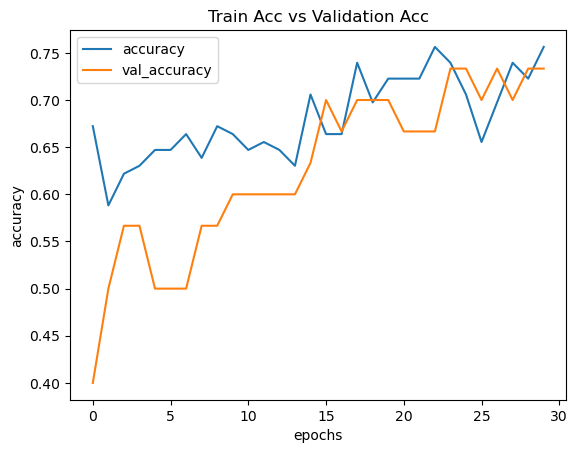

In [21]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Train Acc vs Validation Acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

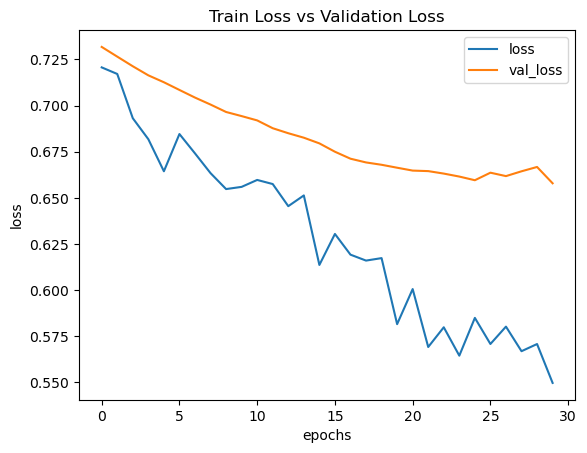

In [22]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Train Loss vs Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss","val_loss"])
plt.show()

In [23]:
model.save(r"C:\Users\prade\OneDrive\Desktop\model approach\weights.h5")

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu (PReLU)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_1 (PReLU)               │ (None, 3)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 416 (1.63 KB)

 Trainable params: 136 (544.00 B)

 Non-trainable params: 6 (24.00 B)

 Optimizer params: 274 (1.07 KB)

In [25]:
df

,How spontaneous are you?,Do you enjoy giving or receiving surprises?\n,\nHow important is music taste compatibility to you?\n,"How open are you to trying new things (food, travel, experiences)?",How much personal space do you need in a relationship?,How emotionally expressive are you?,How important is having similar long-term goals?,What’s your preferred mode of communication?,What’s your ideal time to hang out?,What is your ideal weekend plan?,labels
0,0,2,3,0,3,3,1,1,2,1,0
1,0,2,1,3,2,0,0,0,1,3,0
2,1,4,4,3,1,1,1,2,1,2,1
3,0,3,2,0,2,0,4,2,2,2,0
4,0,3,2,4,3,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
144,4,3,1,4,3,3,4,1,2,2,0
145,0,2,4,0,2,2,0,1,1,2,0
146,0,2,2,0,3,1,0,2,1,1,0
147,3,3,2,4,0,4,4,0,1,1,1


# Hyper parameter tuning

# Grid search

In [26]:
import optuna

c:\Users\prade\anaconda3\envs\giri\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
from keras import initializers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, PReLU, Input, Dropout, BatchNormalization, Activation
from keras.metrics import Precision, Recall



def objective(trial):
  model = Sequential()
  model.add(Input(shape=(10,)))
  num_layers = trial.suggest_int("num_layers", 1, 4)
  for i in range(num_layers):
        units = trial.suggest_int(f"units_l{i}", 4, 16)
        init_choice = trial.suggest_categorical(f"initializer_l{i}", ["glorot_normal", "he_normal", "glorot_uniform", "he_uniform"])
        reg_choice = trial.suggest_categorical(f"regularizer_l{i}", ["l1", "l2"])
        use_prelu = trial.suggest_categorical(f"use_prelu_l{i}", [True, False])

        initializer = getattr(initializers, init_choice)()
        regularizer = getattr(regularizers, reg_choice)(0.01)

        model.add(Dense(units=units, kernel_initializer=initializer, kernel_regularizer=regularizer))

        if use_prelu:
            model.add(PReLU())
            model.add(BatchNormalization())
            dropout_rate = trial.suggest_float(f"dropout_l{i}", 0.0, 0.5)
            model.add(Dropout(dropout_rate))
        else:
            activation = trial.suggest_categorical(f"activation_l{i}", ["relu", "sigmoid", "tanh"])
            model.add(Activation(activation))

  model.add(Dense(1, activation="sigmoid"))
  model.compile(optimizer=trial.suggest_categorical("optimizer", ["adam", "sgd", "adagrad"]),loss="binary_crossentropy",metrics=["accuracy", Precision(), Recall()])
  
  history = model.fit(x,y,epochs=30,batch_size=8,validation_split=0.2)
  return history.history['val_loss'][-1]


In [28]:
space = {
    "num_layers": [2],
    
    "units_l0": [8,16],
    "initializer_l0": ["glorot_normal"],
    "regularizer_l0": ["l2"],
    "dropout_l0": [0.2],
    "use_prelu_l0": [True,False],
    "activation_l0": ["relu","tanh","sigmoid"],
    
    "units_l1": [8,16],
    "initializer_l1": ["glorot_normal"],
    "regularizer_l1": ["l2"],
    "dropout_l1": [0.2],
    "use_prelu_l1": [True,False],
    "activation_l1": ["relu","tanh","sigmoid"],
    
    "optimizer": ["adam","sgd","adagrad"]
}


In [29]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.GridSampler(space))
study.optimize(objective, n_trials=30)

[I 2025-05-21 23:40:08,013] A new study created in memory with name: no-name-98eca673-567c-4118-b51f-47a5552290a4


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5060 - loss: 0.9845 - precision_1: 0.4257 - recall_1: 0.5884 - val_accuracy: 0.6000 - val_loss: 0.9136 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5501 - loss: 0.9388 - precision_1: 0.4237 - recall_1: 0.6055 - val_accuracy: 0.6000 - val_loss: 0.9071 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5151 - loss: 0.9873 - precision_1: 0.4485 - recall_1: 0.6305 - val_accuracy: 0.6000 - val_loss: 0.9022 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5439 - loss: 0.9458 - precision_1: 0.4854 - recall_1: 0.5996 - val_accuracy: 0.5333 - val_loss: 0.8982 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6753 - loss: 0.8406 - precision_1: 

[I 2025-05-21 23:40:26,633] Trial 0 finished with value: 0.7595186233520508 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'tanh', 'units_l1': 8, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adam'}. Best is trial 0 with value: 0.7595186233520508.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.4471 - loss: 1.1724 - precision_2: 0.3807 - recall_2: 0.3976 - val_accuracy: 0.6000 - val_loss: 0.9064 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5506 - loss: 0.9939 - precision_2: 0.4566 - recall_2: 0.5397 - val_accuracy: 0.6000 - val_loss: 0.9001 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5139 - loss: 1.0351 - precision_2: 0.4206 - recall_2: 0.4141 - val_accuracy: 0.6000 - val_loss: 0.8911 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5365 - loss: 0.8906 - precision_2: 0.4740 - recall_2: 0.4646 - val_accuracy: 0.6000 - val_loss: 0.8849 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5932 - loss: 0.8840 - precision_2: 

[I 2025-05-21 23:40:43,277] Trial 1 finished with value: 0.7397962212562561 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'sigmoid', 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adam'}. Best is trial 1 with value: 0.7397962212562561.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.5304 - loss: 1.1107 - precision_3: 0.3525 - recall_3: 0.3851 - val_accuracy: 0.4333 - val_loss: 0.9225 - val_precision_3: 0.4138 - val_recall_3: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6832 - loss: 0.7860 - precision_3: 0.7041 - recall_3: 0.6598 - val_accuracy: 0.4333 - val_loss: 0.8874 - val_precision_3: 0.4138 - val_recall_3: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5276 - loss: 0.9758 - precision_3: 0.4768 - recall_3: 0.4217 - val_accuracy: 0.5000 - val_loss: 0.8531 - val_precision_3: 0.4444 - val_recall_3: 1.0000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5416 - loss: 1.0626 - precision_3: 0.4071 - recall_3: 0.4523 - val_accuracy: 0.5667 - val_loss: 0.8279 - val_precision_3: 0.4800 - val_recall_3: 1.0000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5779 - loss: 0.8656 - precision_3: 0.5640 - recall_3: 0.4856 - val

[I 2025-05-21 23:41:03,643] Trial 2 finished with value: 0.5889115929603577 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'relu', 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.5477 - loss: 0.8874 - precision_4: 0.4848 - recall_4: 0.2836 - val_accuracy: 0.4000 - val_loss: 0.9290 - val_precision_4: 0.1250 - val_recall_4: 0.0833
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4867 - loss: 0.9131 - precision_4: 0.4883 - recall_4: 0.2512 - val_accuracy: 0.4667 - val_loss: 0.9117 - val_precision_4: 0.2500 - val_recall_4: 0.1667
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6436 - loss: 0.8343 - precision_4: 0.5820 - recall_4: 0.3700 - val_accuracy: 0.5000 - val_loss: 0.9004 - val_precision_4: 0.2000 - val_recall_4: 0.0833
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6344 - loss: 0.8406 - precision_4: 0.4676 - recall_4: 0.2596 - val_accuracy: 0.5000 - val_loss: 0.8871 - val_precision_4: 0.2000 - val_recall_4: 0.0833
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6070 - loss: 0.8501 - precision_4: 0.6161 - recall_4: 0.3522 - val_

[I 2025-05-21 23:41:15,856] Trial 3 finished with value: 0.761407196521759 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'tanh', 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'tanh', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4829 - loss: 0.9566 - precision_5: 0.3512 - recall_5: 0.4632 - val_accuracy: 0.5667 - val_loss: 0.9277 - val_precision_5: 0.4444 - val_recall_5: 0.3333
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5090 - loss: 0.8888 - precision_5: 0.4967 - recall_5: 0.4577 - val_accuracy: 0.4333 - val_loss: 0.9270 - val_precision_5: 0.3077 - val_recall_5: 0.3333
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5652 - loss: 0.8858 - precision_5: 0.4812 - recall_5: 0.4901 - val_accuracy: 0.4667 - val_loss: 0.9311 - val_precision_5: 0.3750 - val_recall_5: 0.5000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7051 - loss: 0.8174 - precision_5: 0.6196 - recall_5: 0.7183 - val_accuracy: 0.4667 - val_loss: 0.9283 - val_precision_5: 0.3750 - val_recall_5: 0.5000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6536 - loss: 0.8156 - precision_5: 0.5623 - recall_5: 0.6311 - val_

[I 2025-05-21 23:41:26,905] Trial 4 finished with value: 0.7235793471336365 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'relu', 'units_l1': 8, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.5227 - loss: 1.0124 - precision_6: 0.4834 - recall_6: 0.5346 - val_accuracy: 0.4000 - val_loss: 1.3690 - val_precision_6: 0.4000 - val_recall_6: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6632 - loss: 0.8975 - precision_6: 0.5897 - recall_6: 0.6453 - val_accuracy: 0.4000 - val_loss: 1.2506 - val_precision_6: 0.3929 - val_recall_6: 0.9167
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6092 - loss: 0.8846 - precision_6: 0.5094 - recall_6: 0.5779 - val_accuracy: 0.4000 - val_loss: 1.1550 - val_precision_6: 0.3929 - val_recall_6: 0.9167
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7178 - loss: 0.7987 - precision_6: 0.6688 - recall_6: 0.6782 - val_accuracy: 0.4000 - val_loss: 1.1041 - val_precision_6: 0.3929 - val_recall_6: 0.9167
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6704 - loss: 0.9022 - precision_6: 0.6217 - recall_6: 0.6194 - val_

[I 2025-05-21 23:41:37,538] Trial 5 finished with value: 0.7674128413200378 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 8, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'relu', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4186 - loss: 1.1921 - precision_7: 0.3875 - recall_7: 0.4559 - val_accuracy: 0.6667 - val_loss: 0.9556 - val_precision_7: 0.6250 - val_recall_7: 0.4167
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4929 - loss: 1.0997 - precision_7: 0.3754 - recall_7: 0.5053 - val_accuracy: 0.6667 - val_loss: 0.9501 - val_precision_7: 0.6000 - val_recall_7: 0.5000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5166 - loss: 1.0190 - precision_7: 0.4249 - recall_7: 0.5650 - val_accuracy: 0.6000 - val_loss: 0.9418 - val_precision_7: 0.5000 - val_recall_7: 0.5000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5680 - loss: 0.9473 - precision_7: 0.4695 - recall_7: 0.6077 - val_accuracy: 0.6000 - val_loss: 0.9350 - val_precision_7: 0.5000 - val_recall_7: 0.5000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6204 - loss: 0.9271 - precision_7: 0.5890 - recall_7: 0.6033 - val_

[I 2025-05-21 23:41:45,973] Trial 6 finished with value: 0.7545698285102844 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'sigmoid', 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4823 - loss: 1.1581 - precision_8: 0.3801 - recall_8: 0.4680 - val_accuracy: 0.5333 - val_loss: 0.8877 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5011 - loss: 1.0274 - precision_8: 0.3184 - recall_8: 0.5566 - val_accuracy: 0.5667 - val_loss: 0.8681 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4505 - loss: 1.0594 - precision_8: 0.4265 - recall_8: 0.4071 - val_accuracy: 0.5667 - val_loss: 0.8529 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5932 - loss: 0.9509 - precision_8: 0.5565 - recall_8: 0.5337 - val_accuracy: 0.5333 - val_loss: 0.8433 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5724 - loss: 0.9055 - precision_8: 0

[I 2025-05-21 23:41:54,442] Trial 7 finished with value: 0.8520972728729248 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'relu', 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.4270 - loss: 1.0991 - precision_9: 0.4270 - recall_9: 1.0000 - val_accuracy: 0.4000 - val_loss: 1.0682 - val_precision_9: 0.4000 - val_recall_9: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4455 - loss: 1.0173 - precision_9: 0.4455 - recall_9: 1.0000 - val_accuracy: 0.4000 - val_loss: 1.0193 - val_precision_9: 0.4000 - val_recall_9: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4087 - loss: 1.0104 - precision_9: 0.4087 - recall_9: 1.0000 - val_accuracy: 0.4000 - val_loss: 0.9806 - val_precision_9: 0.4000 - val_recall_9: 1.0000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4012 - loss: 0.9754 - precision_9: 0.3972 - recall_9: 0.9789 - val_accuracy: 0.4333 - val_loss: 0.9509 - val_precision_9: 0.4138 - val_recall_9: 1.0000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4498 - loss: 0.9358 - precision_9: 0.4405 - recall_9: 0.9534 - val

[I 2025-05-21 23:42:24,719] Trial 8 finished with value: 0.7327045202255249 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'relu', 'units_l1': 8, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'sigmoid', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 0.4182 - loss: 1.1249 - precision_10: 0.4100 - recall_10: 0.7981 - val_accuracy: 0.5667 - val_loss: 0.9694 - val_precision_10: 0.4737 - val_recall_10: 0.7500
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5163 - loss: 1.0889 - precision_10: 0.4918 - recall_10: 0.7756 - val_accuracy: 0.5333 - val_loss: 0.9451 - val_precision_10: 0.4444 - val_recall_10: 0.6667
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5451 - loss: 1.0003 - precision_10: 0.4541 - recall_10: 0.7765 - val_accuracy: 0.6333 - val_loss: 0.9245 - val_precision_10: 0.5294 - val_recall_10: 0.7500
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5314 - loss: 0.9648 - precision_10: 0.4708 - recall_10: 0.7862 - val_accuracy: 0.6333 - val_loss: 0.9100 - val_precision_10: 0.5294 - val_recall_10: 0.7500
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5387 - loss: 0.9364 - precision_10: 0.4563 - recal

[I 2025-05-21 23:42:49,350] Trial 9 finished with value: 0.7706573605537415 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'relu', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.3830 - loss: 1.0774 - precision_11: 0.3679 - recall_11: 0.6485 - val_accuracy: 0.6000 - val_loss: 0.8886 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3746 - loss: 1.0658 - precision_11: 0.3015 - recall_11: 0.4568 - val_accuracy: 0.6000 - val_loss: 0.8553 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4608 - loss: 0.9547 - precision_11: 0.3962 - recall_11: 0.5591 - val_accuracy: 0.6000 - val_loss: 0.8432 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3979 - loss: 0.9641 - precision_11: 0.2927 - recall_11: 0.3823 - val_accuracy: 0.6000 - val_loss: 0.8331 - val_precision_11: 0.5000 - val_recall_11: 0.0833
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3676 - loss: 1.0023 - prec

[I 2025-05-21 23:43:06,724] Trial 10 finished with value: 0.7241865992546082 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'relu', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.5653 - loss: 0.9889 - precision_12: 0.3390 - recall_12: 0.0990 - val_accuracy: 0.5667 - val_loss: 0.9927 - val_precision_12: 0.4000 - val_recall_12: 0.1667
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5301 - loss: 1.0001 - precision_12: 0.4459 - recall_12: 0.1957 - val_accuracy: 0.5667 - val_loss: 0.9891 - val_precision_12: 0.4000 - val_recall_12: 0.1667
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6064 - loss: 0.9810 - precision_12: 0.5902 - recall_12: 0.2032 - val_accuracy: 0.5667 - val_loss: 0.9857 - val_precision_12: 0.4000 - val_recall_12: 0.1667
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5469 - loss: 0.9864 - precision_12: 0.5516 - recall_12: 0.2014 - val_accuracy: 0.6000 - val_loss: 0.9820 - val_precision_12: 0.5000 - val_recall_12: 0.1667
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5784 - loss: 0.9702 - precision_12: 0.5208 - recal

[I 2025-05-21 23:43:23,238] Trial 11 finished with value: 0.9105309844017029 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'sigmoid', 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'relu', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.6680 - loss: 0.9017 - precision_13: 0.6313 - recall_13: 0.5597 - val_accuracy: 0.4333 - val_loss: 1.0475 - val_precision_13: 0.4138 - val_recall_13: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6211 - loss: 0.8988 - precision_13: 0.5574 - recall_13: 0.5586 - val_accuracy: 0.4667 - val_loss: 1.0283 - val_precision_13: 0.4286 - val_recall_13: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7162 - loss: 0.8173 - precision_13: 0.7547 - recall_13: 0.6531 - val_accuracy: 0.4667 - val_loss: 1.0065 - val_precision_13: 0.4231 - val_recall_13: 0.9167
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7028 - loss: 0.8858 - precision_13: 0.7315 - recall_13: 0.5591 - val_accuracy: 0.5000 - val_loss: 0.9934 - val_precision_13: 0.4400 - val_recall_13: 0.9167
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7698 - loss: 0.8331 - precision_13: 0.8697 - recal

[I 2025-05-21 23:43:41,104] Trial 12 finished with value: 0.8433014750480652 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'relu', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.4792 - loss: 0.9129 - precision_14: 0.4530 - recall_14: 0.7418 - val_accuracy: 0.3667 - val_loss: 0.9475 - val_precision_14: 0.3333 - val_recall_14: 0.5833
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5871 - loss: 0.8821 - precision_14: 0.5015 - recall_14: 0.8928 - val_accuracy: 0.4333 - val_loss: 0.9410 - val_precision_14: 0.3684 - val_recall_14: 0.5833
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5397 - loss: 0.8834 - precision_14: 0.4912 - recall_14: 0.7748 - val_accuracy: 0.4333 - val_loss: 0.9361 - val_precision_14: 0.3684 - val_recall_14: 0.5833
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5764 - loss: 0.8775 - precision_14: 0.4770 - recall_14: 0.7112 - val_accuracy: 0.4333 - val_loss: 0.9321 - val_precision_14: 0.3684 - val_recall_14: 0.5833
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6076 - loss: 0.8797 - precision_14: 0.5154 - recall

[I 2025-05-21 23:43:57,861] Trial 13 finished with value: 0.8937713503837585 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'tanh', 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'tanh', 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.6190 - loss: 0.8228 - precision_15: 0.6018 - recall_15: 0.6077 - val_accuracy: 0.3333 - val_loss: 0.9120 - val_precision_15: 0.1000 - val_recall_15: 0.0833
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6376 - loss: 0.8131 - precision_15: 0.5423 - recall_15: 0.5629 - val_accuracy: 0.3333 - val_loss: 0.9071 - val_precision_15: 0.1000 - val_recall_15: 0.0833
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6716 - loss: 0.7773 - precision_15: 0.6223 - recall_15: 0.6315 - val_accuracy: 0.4000 - val_loss: 0.9032 - val_precision_15: 0.2000 - val_recall_15: 0.1667
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6166 - loss: 0.8873 - precision_15: 0.5530 - recall_15: 0.4556 - val_accuracy: 0.4000 - val_loss: 0.8972 - val_precision_15: 0.2000 - val_recall_15: 0.1667
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6090 - loss: 0.8638 - precision_15: 0.4906 - recal

[I 2025-05-21 23:44:18,291] Trial 14 finished with value: 0.7810840010643005 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'tanh', 'units_l1': 8, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.4671 - loss: 1.1856 - precision_16: 0.4365 - recall_16: 0.5009 - val_accuracy: 0.5667 - val_loss: 0.9974 - val_precision_16: 0.3333 - val_recall_16: 0.0833
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4669 - loss: 1.1661 - precision_16: 0.3855 - recall_16: 0.4319 - val_accuracy: 0.5333 - val_loss: 0.9923 - val_precision_16: 0.2500 - val_recall_16: 0.0833
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4019 - loss: 1.2598 - precision_16: 0.3044 - recall_16: 0.3522 - val_accuracy: 0.6000 - val_loss: 0.9926 - val_precision_16: 0.5000 - val_recall_16: 0.2500
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5341 - loss: 1.1164 - precision_16: 0.4524 - recall_16: 0.4789 - val_accuracy: 0.5667 - val_loss: 0.9933 - val_precision_16: 0.4286 - val_recall_16: 0.2500
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4091 - loss: 1.1516 - precision_16: 0.3208 - recal

[I 2025-05-21 23:44:38,307] Trial 15 finished with value: 1.016075849533081 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.4847 - loss: 1.0340 - precision_17: 0.4526 - recall_17: 0.5168 - val_accuracy: 0.6000 - val_loss: 0.9876 - val_precision_17: 0.0000e+00 - val_recall_17: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5710 - loss: 1.0574 - precision_17: 0.5239 - recall_17: 0.6350 - val_accuracy: 0.5667 - val_loss: 0.9629 - val_precision_17: 0.0000e+00 - val_recall_17: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5381 - loss: 1.0226 - precision_17: 0.4863 - recall_17: 0.5788 - val_accuracy: 0.4667 - val_loss: 0.9486 - val_precision_17: 0.0000e+00 - val_recall_17: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5796 - loss: 0.9265 - precision_17: 0.4630 - recall_17: 0.5036 - val_accuracy: 0.5333 - val_loss: 0.9386 - val_precision_17: 0.3333 - val_recall_17: 0.1667
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6507 - loss: 0.8871 - prec

[I 2025-05-21 23:45:01,256] Trial 16 finished with value: 0.73577880859375 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.5354 - loss: 1.1615 - precision_18: 0.4169 - recall_18: 0.5745 - val_accuracy: 0.4000 - val_loss: 1.1833 - val_precision_18: 0.3750 - val_recall_18: 0.7500
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6007 - loss: 1.0886 - precision_18: 0.4906 - recall_18: 0.6221 - val_accuracy: 0.4000 - val_loss: 1.1609 - val_precision_18: 0.3500 - val_recall_18: 0.5833
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5999 - loss: 1.1216 - precision_18: 0.5287 - recall_18: 0.5626 - val_accuracy: 0.3667 - val_loss: 1.1471 - val_precision_18: 0.3158 - val_recall_18: 0.5000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5130 - loss: 1.1943 - precision_18: 0.4288 - recall_18: 0.5498 - val_accuracy: 0.3333 - val_loss: 1.1403 - val_precision_18: 0.2778 - val_recall_18: 0.4167
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4656 - loss: 1.2227 - precision_18: 0.4353 - recal

[I 2025-05-21 23:45:21,506] Trial 17 finished with value: 1.1091570854187012 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.3551 - loss: 1.1778 - precision_19: 0.3196 - recall_19: 0.4773 - val_accuracy: 0.5333 - val_loss: 1.0641 - val_precision_19: 0.0000e+00 - val_recall_19: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4729 - loss: 1.0611 - precision_19: 0.3621 - recall_19: 0.4176 - val_accuracy: 0.5667 - val_loss: 1.0290 - val_precision_19: 0.3333 - val_recall_19: 0.0833
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5655 - loss: 1.0038 - precision_19: 0.5381 - recall_19: 0.4511 - val_accuracy: 0.5667 - val_loss: 1.0033 - val_precision_19: 0.4000 - val_recall_19: 0.1667
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5882 - loss: 0.9535 - precision_19: 0.4840 - recall_19: 0.4984 - val_accuracy: 0.6000 - val_loss: 0.9776 - val_precision_19: 0.5000 - val_recall_19: 0.3333
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4520 - loss: 0.9792 - precision_19: 0.3866

[I 2025-05-21 23:45:42,024] Trial 18 finished with value: 0.7937071919441223 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'tanh', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.4921 - loss: 1.0373 - precision_20: 0.3350 - recall_20: 0.4044 - val_accuracy: 0.4000 - val_loss: 0.9274 - val_precision_20: 0.3846 - val_recall_20: 0.8333
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5637 - loss: 0.9667 - precision_20: 0.5225 - recall_20: 0.6200 - val_accuracy: 0.4000 - val_loss: 0.9117 - val_precision_20: 0.3750 - val_recall_20: 0.7500
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6145 - loss: 0.9536 - precision_20: 0.5316 - recall_20: 0.6389 - val_accuracy: 0.5333 - val_loss: 0.8979 - val_precision_20: 0.4444 - val_recall_20: 0.6667
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5602 - loss: 0.9231 - precision_20: 0.5128 - recall_20: 0.5258 - val_accuracy: 0.5667 - val_loss: 0.8889 - val_precision_20: 0.4706 - val_recall_20: 0.6667
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6671 - loss: 0.8017 - precision_20: 0.6501 - recal

[I 2025-05-21 23:46:02,710] Trial 19 finished with value: 0.6773274540901184 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'sigmoid', 'units_l1': 8, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.4339 - loss: 0.9477 - precision_21: 0.3687 - recall_21: 0.4058 - val_accuracy: 0.5667 - val_loss: 0.9133 - val_precision_21: 0.0000e+00 - val_recall_21: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3781 - loss: 0.9620 - precision_21: 0.2099 - recall_21: 0.2334 - val_accuracy: 0.5667 - val_loss: 0.9036 - val_precision_21: 0.0000e+00 - val_recall_21: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4469 - loss: 0.9145 - precision_21: 0.3325 - recall_21: 0.3567 - val_accuracy: 0.5667 - val_loss: 0.8953 - val_precision_21: 0.0000e+00 - val_recall_21: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5262 - loss: 0.8902 - precision_21: 0.4281 - recall_21: 0.3434 - val_accuracy: 0.5333 - val_loss: 0.8885 - val_precision_21: 0.0000e+00 - val_recall_21: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4875 - loss: 0.890

[I 2025-05-21 23:46:23,114] Trial 20 finished with value: 0.7243404388427734 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 8, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'sigmoid', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4827 - loss: 1.2239 - precision_22: 0.4152 - recall_22: 0.4923 - val_accuracy: 0.5667 - val_loss: 0.9546 - val_precision_22: 0.4444 - val_recall_22: 0.3333
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5494 - loss: 1.0354 - precision_22: 0.3959 - recall_22: 0.5210 - val_accuracy: 0.5667 - val_loss: 0.8991 - val_precision_22: 0.4615 - val_recall_22: 0.5000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5116 - loss: 1.0553 - precision_22: 0.4532 - recall_22: 0.5362 - val_accuracy: 0.5000 - val_loss: 0.8824 - val_precision_22: 0.4000 - val_recall_22: 0.5000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5453 - loss: 0.9998 - precision_22: 0.4903 - recall_22: 0.4833 - val_accuracy: 0.5333 - val_loss: 0.8672 - val_precision_22: 0.4375 - val_recall_22: 0.5833
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6458 - loss: 0.8735 - precision_22: 0.6418 - recall

[I 2025-05-21 23:46:34,918] Trial 21 finished with value: 0.6410026550292969 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'sgd'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.4356 - loss: 1.0762 - precision_23: 0.3276 - recall_23: 0.3664 - val_accuracy: 0.5333 - val_loss: 0.9416 - val_precision_23: 0.3750 - val_recall_23: 0.2500
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5082 - loss: 1.0245 - precision_23: 0.4339 - recall_23: 0.4732 - val_accuracy: 0.5333 - val_loss: 0.9426 - val_precision_23: 0.3750 - val_recall_23: 0.2500
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5397 - loss: 0.9325 - precision_23: 0.4613 - recall_23: 0.5376 - val_accuracy: 0.5333 - val_loss: 0.9438 - val_precision_23: 0.3750 - val_recall_23: 0.2500
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5181 - loss: 0.9681 - precision_23: 0.5069 - recall_23: 0.4868 - val_accuracy: 0.5333 - val_loss: 0.9459 - val_precision_23: 0.4000 - val_recall_23: 0.3333
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5765 - loss: 0.8736 - precision_23: 0.4790 - recal

[I 2025-05-21 23:46:54,357] Trial 22 finished with value: 0.906111478805542 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'relu', 'units_l1': 8, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.4810 - loss: 0.8944 - precision_24: 0.4194 - recall_24: 0.6489 - val_accuracy: 0.4333 - val_loss: 0.9612 - val_precision_24: 0.4138 - val_recall_24: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5047 - loss: 0.8886 - precision_24: 0.4072 - recall_24: 0.6938 - val_accuracy: 0.4333 - val_loss: 0.9237 - val_precision_24: 0.4138 - val_recall_24: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3731 - loss: 0.8749 - precision_24: 0.3373 - recall_24: 0.5069 - val_accuracy: 0.4000 - val_loss: 0.8988 - val_precision_24: 0.4000 - val_recall_24: 1.0000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5938 - loss: 0.8381 - precision_24: 0.4996 - recall_24: 0.7309 - val_accuracy: 0.4000 - val_loss: 0.8769 - val_precision_24: 0.4000 - val_recall_24: 1.0000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5438 - loss: 0.8319 - precision_24: 0.4876 - recal

[I 2025-05-21 23:47:14,127] Trial 23 finished with value: 0.6510282158851624 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 8, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'relu', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.4856 - loss: 0.9808 - precision_25: 0.4099 - recall_25: 0.4294 - val_accuracy: 0.4000 - val_loss: 1.2794 - val_precision_25: 0.4000 - val_recall_25: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6160 - loss: 0.8500 - precision_25: 0.5599 - recall_25: 0.5933 - val_accuracy: 0.4000 - val_loss: 1.1993 - val_precision_25: 0.4000 - val_recall_25: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5535 - loss: 0.8649 - precision_25: 0.4860 - recall_25: 0.5199 - val_accuracy: 0.4000 - val_loss: 1.1368 - val_precision_25: 0.4000 - val_recall_25: 1.0000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4371 - loss: 0.9280 - precision_25: 0.3620 - recall_25: 0.4500 - val_accuracy: 0.4000 - val_loss: 1.0840 - val_precision_25: 0.3929 - val_recall_25: 0.9167
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5346 - loss: 0.9036 - precision_25: 0.4901 - recal

[I 2025-05-21 23:47:32,616] Trial 24 finished with value: 0.9008715748786926 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'relu', 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.4990 - loss: 1.0045 - precision_26: 0.4989 - recall_26: 0.4634 - val_accuracy: 0.4000 - val_loss: 0.9257 - val_precision_26: 0.3333 - val_recall_26: 0.5000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4082 - loss: 1.0409 - precision_26: 0.3053 - recall_26: 0.3908 - val_accuracy: 0.4000 - val_loss: 0.9229 - val_precision_26: 0.3125 - val_recall_26: 0.4167
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 0.9600 - precision_26: 0.4423 - recall_26: 0.4779 - val_accuracy: 0.3000 - val_loss: 0.9207 - val_precision_26: 0.1538 - val_recall_26: 0.1667
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4523 - loss: 0.9995 - precision_26: 0.3089 - recall_26: 0.3485 - val_accuracy: 0.3000 - val_loss: 0.9192 - val_precision_26: 0.1538 - val_recall_26: 0.1667
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5044 - loss: 0.9064 - precision_26: 0.4164 - recal

[I 2025-05-21 23:47:50,627] Trial 25 finished with value: 0.9422276616096497 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'sigmoid', 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.5574 - loss: 0.9919 - precision_27: 0.4493 - recall_27: 0.6133 - val_accuracy: 0.6000 - val_loss: 0.8787 - val_precision_27: 0.5000 - val_recall_27: 0.8333
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5735 - loss: 1.0066 - precision_27: 0.5656 - recall_27: 0.5182 - val_accuracy: 0.6333 - val_loss: 0.8661 - val_precision_27: 0.5263 - val_recall_27: 0.8333
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6004 - loss: 0.9345 - precision_27: 0.5400 - recall_27: 0.4894 - val_accuracy: 0.6333 - val_loss: 0.8544 - val_precision_27: 0.5263 - val_recall_27: 0.8333
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6056 - loss: 0.9628 - precision_27: 0.5395 - recall_27: 0.5591 - val_accuracy: 0.6333 - val_loss: 0.8409 - val_precision_27: 0.5263 - val_recall_27: 0.8333
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6066 - loss: 0.8928 - precision_27: 0.5474 - recall

[I 2025-05-21 23:48:06,414] Trial 26 finished with value: 0.6591321229934692 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'tanh', 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4402 - loss: 1.0011 - precision_28: 0.3550 - recall_28: 0.4180 - val_accuracy: 0.4667 - val_loss: 0.9498 - val_precision_28: 0.4231 - val_recall_28: 0.9167
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5313 - loss: 0.9448 - precision_28: 0.4498 - recall_28: 0.4873 - val_accuracy: 0.5000 - val_loss: 0.9745 - val_precision_28: 0.4444 - val_recall_28: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6661 - loss: 0.8342 - precision_28: 0.5887 - recall_28: 0.5418 - val_accuracy: 0.4333 - val_loss: 0.9653 - val_precision_28: 0.4000 - val_recall_28: 0.8333
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6457 - loss: 0.8466 - precision_28: 0.5084 - recall_28: 0.5029 - val_accuracy: 0.5333 - val_loss: 0.9356 - val_precision_28: 0.4500 - val_recall_28: 0.7500
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6184 - loss: 0.7574 - precision_28: 0.5254 - recall

[I 2025-05-21 23:48:14,853] Trial 27 finished with value: 0.6912959814071655 and parameters: {'num_layers': 2, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 8, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'sgd'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4585 - loss: 1.1393 - precision_29: 0.3478 - recall_29: 0.3816 - val_accuracy: 0.4333 - val_loss: 0.9771 - val_precision_29: 0.4074 - val_recall_29: 0.9167
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6164 - loss: 0.9233 - precision_29: 0.5334 - recall_29: 0.5920 - val_accuracy: 0.5000 - val_loss: 0.9573 - val_precision_29: 0.4400 - val_recall_29: 0.9167
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5834 - loss: 0.9171 - precision_29: 0.5171 - recall_29: 0.5418 - val_accuracy: 0.5667 - val_loss: 0.9140 - val_precision_29: 0.4783 - val_recall_29: 0.9167
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6560 - loss: 0.9142 - precision_29: 0.6473 - recall_29: 0.5201 - val_accuracy: 0.6667 - val_loss: 0.8851 - val_precision_29: 0.5500 - val_recall_29: 0.9167
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5785 - loss: 0.9568 - precision_29: 0.5624 - recall

[I 2025-05-21 23:48:23,317] Trial 28 finished with value: 0.7847095131874084 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 8, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'sgd'}. Best is trial 2 with value: 0.5889115929603577.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5272 - loss: 1.3604 - precision_30: 0.4728 - recall_30: 0.4620 - val_accuracy: 0.4000 - val_loss: 1.1434 - val_precision_30: 0.3929 - val_recall_30: 0.9167
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5064 - loss: 1.1565 - precision_30: 0.4701 - recall_30: 0.4879 - val_accuracy: 0.4667 - val_loss: 1.1202 - val_precision_30: 0.4231 - val_recall_30: 0.9167
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5302 - loss: 1.1507 - precision_30: 0.4431 - recall_30: 0.6374 - val_accuracy: 0.5667 - val_loss: 1.0655 - val_precision_30: 0.4783 - val_recall_30: 0.9167
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5896 - loss: 1.0587 - precision_30: 0.4798 - recall_30: 0.6145 - val_accuracy: 0.5667 - val_loss: 1.0209 - val_precision_30: 0.4783 - val_recall_30: 0.9167
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6074 - loss: 0.9292 - precision_30: 0.4755 - recall

[I 2025-05-21 23:48:32,689] Trial 29 finished with value: 0.7806957960128784 and parameters: {'num_layers': 2, 'units_l0': 16, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2, 'units_l1': 16, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2, 'optimizer': 'adam'}. Best is trial 2 with value: 0.5889115929603577.


In [30]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_activation_l0,params_activation_l1,params_dropout_l0,params_dropout_l1,params_initializer_l0,...,params_optimizer,params_regularizer_l0,params_regularizer_l1,params_units_l0,params_units_l1,params_use_prelu_l0,params_use_prelu_l1,system_attrs_grid_id,system_attrs_search_space,state
0,0,0.759519,2025-05-21 23:40:08.025093,2025-05-21 23:40:26.629968,0 days 00:00:18.604875,tanh,NaN,NaN,0.2,glorot_normal,...,adam,l2,l2,16,8,False,True,0,"{'activation_l0': ['relu', 'tanh', 'sigmoid'],...",COMPLETE
1,1,0.739796,2025-05-21 23:40:26.635716,2025-05-21 23:40:43.275709,0 days 00:00:16.639993,sigmoid,NaN,NaN,0.2,glorot_normal,...,adam,l2,l2,8,16,False,True,1,"{'activation_l0': ['relu', 'tanh', 'sigmoid'],...",COMPLETE
2,2,0.588912,2025-05-21 23:40:43.283856,2025-05-21 23:41:03.642495,0 days 00:00:20.358639,relu,NaN,NaN,0.2,glorot_normal,...,adam,l2,l2,8,16,False,True,2,"{'activation_l0': ['relu', 'tanh', 'sigmoid'],...",COMPLETE
3,3,0.761407,2025-05-21 23:41:03.644813,2025-05-21 23:41:15.855017,0 days 00:00:12.210204,tanh,tanh,NaN,NaN,glorot_normal,...,adam,l2,l2,8,16,False,False,3,"{'activation_l0': ['relu', 'tanh', 'sigmoid'],...",COMPLETE
4,4,0.723579,2025-05-21 23:41:15.857045,2025-05-21 23:41:26.904475,0 days 00:00:11.047430,relu,NaN,NaN,0.2,glorot_normal,...,adam,l2,l2,16,8,False,True,4,"{'activation_l0': ['relu', 'tanh', 'sigmoid'],...",COMPLETE
5,5,0.767413,2025-05-21 23:41:26.906495,2025-05-21 23:41:37.537984,0 days 00:00:10.631489,NaN,relu,0.2,NaN,glorot_normal,...,adam,l2,l2,16,8,True,False,5,"{'activation_l0': ['relu', 'tanh', 'sigmoid'],...",COMPLETE
6,6,0.754570,2025-05-21 23:41:37.539981,2025-05-21 23:41:45.972837,0 days 00:00:08.432856,sigmoid,NaN,NaN,0.2,glorot_normal,...,adam,l2,l2,16,16,False,True,6,"{'activation_l0': ['relu', 'tanh', 'sigmoid'],...",COMPLETE
7,7,0.852097,2025-05-21 23:41:45.974395,2025-05-21 23:41:54.440952,0 days 00:00:08.466557,relu,NaN,NaN,0.2,glorot_normal,...,adam,l2,l2,8,16,False,True,7,"{'activation_l0': ['relu', 'tanh', 'sigmoid'],...",COMPLETE
8,8,0.732705,2025-05-21 23:41:54.444059,2025-05-21 23:42:24.718410,0 days 00:00:30.274351,relu,sigmoid,NaN,NaN,glorot_normal,...,adam,l2,l2,16,8,False,False,8,"{'activation_l0': ['relu', 'tanh', 'sigmoid'],...",COMPLETE
9,9,0.770657,2025-05-21 23:42:24.722987,2025-05-21 23:42:49.346755,0 days 00:00:24.623768,NaN,relu,0.2,NaN,glorot_normal,...,adam,l2,l2,16,16,True,False,9,"{'activation_l0': ['relu', 'tanh', 'sigmoid'],...",COMPLETE


In [31]:
study.best_params

{'num_layers': 2,
 'units_l0': 8,
 'initializer_l0': 'glorot_normal',
 'regularizer_l0': 'l2',
 'use_prelu_l0': False,
 'activation_l0': 'relu',
 'units_l1': 16,
 'initializer_l1': 'glorot_normal',
 'regularizer_l1': 'l2',
 'use_prelu_l1': True,
 'dropout_l1': 0.2,
 'optimizer': 'adam'}

In [56]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(10,)))

model.add(keras.layers.Dense(units=8, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=42),
                             kernel_regularizer = keras.regularizers.L2()))


model.add(keras.layers.Dense(units=16,kernel_initializer=keras.initializers.GlorotNormal(seed=42),
                             kernel_regularizer = keras.regularizers.l2()))
model.add(keras.layers.PReLU())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
history = model.fit(x, y, epochs=30, batch_size=8, validation_split=0.2)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.3623 - loss: 1.1736 - precision_61: 0.2969 - recall_61: 0.4194 - val_accuracy: 0.6333 - val_loss: 0.9150 - val_precision_61: 0.5385 - val_recall_61: 0.5833
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3308 - loss: 1.1238 - precision_61: 0.2677 - recall_61: 0.4208 - val_accuracy: 0.4667 - val_loss: 0.9042 - val_precision_61: 0.3889 - val_recall_61: 0.5833
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4141 - loss: 1.0251 - precision_61: 0.3041 - recall_61: 0.3470 - val_accuracy: 0.4667 - val_loss: 0.8949 - val_precision_61: 0.3889 - val_recall_61: 0.5833
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4659 - loss: 1.0651 - precision_61: 0.4101 - recall_61: 0.5414 - val_accuracy: 0.4667 - val_loss: 0.8837 - val_precision_61: 0.3889 - val_recall_61: 0.5833
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4438 - loss: 0.9431 - precision_61: 0.3668 - recall

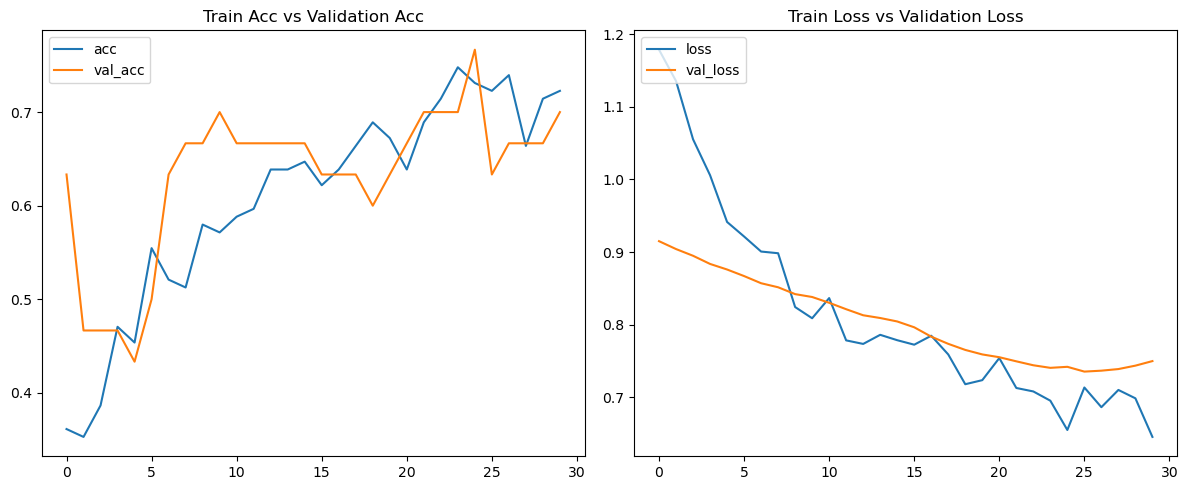

In [57]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(history.history["accuracy"])
axs[0].plot(history.history["val_accuracy"])
axs[0].set_title("Train Acc vs Validation Acc")
axs[0].legend(["acc", "val_acc"], loc="upper left")

axs[1].plot(history.history["loss"])
axs[1].plot(history.history["val_loss"])
axs[1].set_title("Train Loss vs Validation Loss")
axs[1].legend(["loss", "val_loss"], loc="upper left")

plt.tight_layout()
plt.show()


# Random Search

In [38]:
from keras import initializers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, PReLU, Input, Dropout, BatchNormalization, Activation
from keras.metrics import Precision, Recall



def objective(trial):
  model = Sequential()
  model.add(Input(shape=(10,)))
  num_layers = trial.suggest_int("num_layers", 1, 4)
  for i in range(num_layers):
        units = trial.suggest_int(f"units_l{i}", 4, 16)
        init_choice = trial.suggest_categorical(f"initializer_l{i}", ["glorot_normal", "he_normal", "glorot_uniform", "he_uniform"])
        reg_choice = trial.suggest_categorical(f"regularizer_l{i}", ["l1", "l2"])
        use_prelu = trial.suggest_categorical(f"use_prelu_l{i}", [True, False])

        initializer = getattr(initializers, init_choice)()
        regularizer = getattr(regularizers, reg_choice)(0.01)

        model.add(Dense(units=units, kernel_initializer=initializer, kernel_regularizer=regularizer))

        if use_prelu:
            model.add(PReLU())
            model.add(BatchNormalization())
            dropout_rate = trial.suggest_float(f"dropout_l{i}", 0.0, 0.5)
            model.add(Dropout(dropout_rate))
        else:
            activation = trial.suggest_categorical(f"activation_l{i}", ["relu", "sigmoid", "tanh"])
            model.add(Activation(activation))

  model.add(Dense(1, activation="sigmoid"))
  model.compile(optimizer=trial.suggest_categorical("optimizer", ["adam", "sgd", "adagrad"]),loss="binary_crossentropy",metrics=["accuracy", Precision(), Recall()])
  
  history = model.fit(x,y,epochs=30,batch_size=8,validation_split=0.2)
  return history.history['val_loss'][-1]


In [40]:
study = optuna.create_study(direction='minimize', sampler = optuna.samplers.RandomSampler())
study.optimize(objective, n_trials=10)

[I 2025-05-21 23:57:49,660] A new study created in memory with name: no-name-078542a4-ec71-46bb-b911-2352ab0560f3


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4939 - loss: 1.1588 - precision_37: 0.4269 - recall_37: 0.7935 - val_accuracy: 0.4333 - val_loss: 1.1384 - val_precision_37: 0.4074 - val_recall_37: 0.9167
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5488 - loss: 1.1464 - precision_37: 0.4775 - recall_37: 0.7073 - val_accuracy: 0.6333 - val_loss: 1.1220 - val_precision_37: 0.5263 - val_recall_37: 0.8333
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6205 - loss: 1.1199 - precision_37: 0.5584 - recall_37: 0.6099 - val_accuracy: 0.7333 - val_loss: 1.1097 - val_precision_37: 0.6429 - val_recall_37: 0.7500
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6419 - loss: 1.1225 - precision_37: 0.5013 - recall_37: 0.5805 - val_accuracy: 0.7333 - val_loss: 1.1003 - val_precision_37: 0.6667 - val_recall_37: 0.6667
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6607 - loss: 1.1039 - precision_37: 0.6042 - recall_37:

[I 2025-05-21 23:57:55,912] Trial 0 finished with value: 0.9926654100418091 and parameters: {'num_layers': 2, 'units_l0': 7, 'initializer_l0': 'glorot_uniform', 'regularizer_l0': 'l1', 'use_prelu_l0': False, 'activation_l0': 'relu', 'units_l1': 12, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l1', 'use_prelu_l1': False, 'activation_l1': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 0 with value: 0.9926654100418091.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4093 - loss: 0.9065 - precision_38: 0.3639 - recall_38: 0.4082 - val_accuracy: 0.6333 - val_loss: 0.8657 - val_precision_38: 0.5455 - val_recall_38: 0.5000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4730 - loss: 0.8897 - precision_38: 0.2787 - recall_38: 0.3326 - val_accuracy: 0.6333 - val_loss: 0.8584 - val_precision_38: 0.5556 - val_recall_38: 0.4167
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5389 - loss: 0.8641 - precision_38: 0.4032 - recall_38: 0.3742 - val_accuracy: 0.5667 - val_loss: 0.8518 - val_precision_38: 0.4000 - val_recall_38: 0.1667
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5440 - loss: 0.8587 - precision_38: 0.4622 - recall_38: 0.3216 - val_accuracy: 0.5667 - val_loss: 0.8468 - val_precision_38: 0.4000 - val_recall_38: 0.1667
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5287 - loss: 0.8768 - precision_38: 0.4444 - recall

[I 2025-05-21 23:58:04,370] Trial 1 finished with value: 0.7936531901359558 and parameters: {'num_layers': 2, 'units_l0': 9, 'initializer_l0': 'glorot_uniform', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'sigmoid', 'units_l1': 6, 'initializer_l1': 'glorot_uniform', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'relu', 'optimizer': 'sgd'}. Best is trial 1 with value: 0.7936531901359558.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4395 - loss: 1.5625 - precision_39: 0.3901 - recall_39: 0.4105 - val_accuracy: 0.5667 - val_loss: 1.2716 - val_precision_39: 0.4737 - val_recall_39: 0.7500
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5713 - loss: 1.4955 - precision_39: 0.4938 - recall_39: 0.5048 - val_accuracy: 0.6333 - val_loss: 1.2609 - val_precision_39: 0.5263 - val_recall_39: 0.8333
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5301 - loss: 1.6255 - precision_39: 0.4388 - recall_39: 0.5690 - val_accuracy: 0.6667 - val_loss: 1.2508 - val_precision_39: 0.5556 - val_recall_39: 0.8333
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5744 - loss: 1.4863 - precision_39: 0.4485 - recall_39: 0.5758 - val_accuracy: 0.6667 - val_loss: 1.2385 - val_precision_39: 0.5556 - val_recall_39: 0.8333
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5532 - loss: 1.4849 - precision_39: 0.4672 - recall_

[I 2025-05-21 23:58:15,062] Trial 2 finished with value: 1.2572243213653564 and parameters: {'num_layers': 3, 'units_l0': 4, 'initializer_l0': 'he_uniform', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.24212314426995835, 'units_l1': 8, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l1', 'use_prelu_l1': True, 'dropout_l1': 0.2740238248993532, 'units_l2': 12, 'initializer_l2': 'he_uniform', 'regularizer_l2': 'l1', 'use_prelu_l2': True, 'dropout_l2': 0.39570081417107866, 'optimizer': 'adagrad'}. Best is trial 1 with value: 0.7936531901359558.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.4690 - loss: 0.9451 - precision_40: 0.3664 - recall_40: 0.5697 - val_accuracy: 0.6000 - val_loss: 0.9325 - val_precision_40: 0.0000e+00 - val_recall_40: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5690 - loss: 0.9400 - precision_40: 0.4719 - recall_40: 0.5912 - val_accuracy: 0.5333 - val_loss: 0.9047 - val_precision_40: 0.3333 - val_recall_40: 0.1667
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5132 - loss: 0.9618 - precision_40: 0.4215 - recall_40: 0.6465 - val_accuracy: 0.5000 - val_loss: 0.8852 - val_precision_40: 0.3636 - val_recall_40: 0.3333
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4365 - loss: 0.9347 - precision_40: 0.3037 - recall_40: 0.4449 - val_accuracy: 0.5333 - val_loss: 0.8720 - val_precision_40: 0.4000 - val_recall_40: 0.3333
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4790 - loss: 0.9169 - precision_40: 0.4366

[I 2025-05-21 23:58:27,200] Trial 3 finished with value: 0.8358829617500305 and parameters: {'num_layers': 2, 'units_l0': 4, 'initializer_l0': 'he_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.157818137939369, 'units_l1': 5, 'initializer_l1': 'he_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.2092720888692144, 'optimizer': 'adam'}. Best is trial 1 with value: 0.7936531901359558.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5016 - loss: 1.2775 - precision_41: 0.3910 - recall_41: 0.4850 - val_accuracy: 0.5667 - val_loss: 1.2864 - val_precision_41: 0.0000e+00 - val_recall_41: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4457 - loss: 1.2939 - precision_41: 0.3832 - recall_41: 0.4535 - val_accuracy: 0.5333 - val_loss: 1.2809 - val_precision_41: 0.0000e+00 - val_recall_41: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5626 - loss: 1.2331 - precision_41: 0.5195 - recall_41: 0.5042 - val_accuracy: 0.5000 - val_loss: 1.2877 - val_precision_41: 0.0000e+00 - val_recall_41: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5667 - loss: 1.1851 - precision_41: 0.5093 - recall_41: 0.6014 - val_accuracy: 0.4333 - val_loss: 1.2807 - val_precision_41: 0.0000e+00 - val_recall_41: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5137 - loss: 1.1790

[I 2025-05-21 23:58:36,967] Trial 4 finished with value: 0.9683173298835754 and parameters: {'num_layers': 4, 'units_l0': 8, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'relu', 'units_l1': 9, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'tanh', 'units_l2': 7, 'initializer_l2': 'he_uniform', 'regularizer_l2': 'l1', 'use_prelu_l2': False, 'activation_l2': 'relu', 'units_l3': 4, 'initializer_l3': 'he_normal', 'regularizer_l3': 'l2', 'use_prelu_l3': True, 'dropout_l3': 0.32199832355289665, 'optimizer': 'adam'}. Best is trial 1 with value: 0.7936531901359558.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4739 - loss: 1.3063 - precision_42: 0.3879 - recall_42: 0.4968 - val_accuracy: 0.6000 - val_loss: 1.0730 - val_precision_42: 0.5000 - val_recall_42: 0.2500
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4940 - loss: 1.2327 - precision_42: 0.4494 - recall_42: 0.4749 - val_accuracy: 0.6667 - val_loss: 1.0496 - val_precision_42: 0.6250 - val_recall_42: 0.4167
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5706 - loss: 1.1399 - precision_42: 0.4568 - recall_42: 0.5882 - val_accuracy: 0.6333 - val_loss: 1.0377 - val_precision_42: 0.5455 - val_recall_42: 0.5000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4303 - loss: 1.2872 - precision_42: 0.3357 - recall_42: 0.4259 - val_accuracy: 0.6333 - val_loss: 1.0321 - val_precision_42: 0.5385 - val_recall_42: 0.5833
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5450 - loss: 1.1267 - precision_42: 0.4667 - recall

[I 2025-05-21 23:58:46,807] Trial 5 finished with value: 0.8394105434417725 and parameters: {'num_layers': 2, 'units_l0': 14, 'initializer_l0': 'he_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.4559593999411468, 'units_l1': 13, 'initializer_l1': 'he_uniform', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'relu', 'optimizer': 'adam'}. Best is trial 1 with value: 0.7936531901359558.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.4246 - loss: 1.2731 - precision_43: 0.3639 - recall_43: 0.3428 - val_accuracy: 0.4000 - val_loss: 1.2545 - val_precision_43: 0.3750 - val_recall_43: 0.7500
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5484 - loss: 1.1931 - precision_43: 0.4543 - recall_43: 0.4849 - val_accuracy: 0.4333 - val_loss: 1.2309 - val_precision_43: 0.3913 - val_recall_43: 0.7500
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6063 - loss: 1.2653 - precision_43: 0.4538 - recall_43: 0.5244 - val_accuracy: 0.4333 - val_loss: 1.2135 - val_precision_43: 0.3810 - val_recall_43: 0.6667
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5244 - loss: 1.2069 - precision_43: 0.5033 - recall_43: 0.5456 - val_accuracy: 0.3667 - val_loss: 1.2051 - val_precision_43: 0.2667 - val_recall_43: 0.3333
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4648 - loss: 1.2855 - precision_43: 0.3421 - recall

[I 2025-05-21 23:58:59,564] Trial 6 finished with value: 1.2476686239242554 and parameters: {'num_layers': 3, 'units_l0': 5, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.45843930941054467, 'units_l1': 9, 'initializer_l1': 'he_uniform', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.04134743725900758, 'units_l2': 12, 'initializer_l2': 'he_uniform', 'regularizer_l2': 'l2', 'use_prelu_l2': True, 'dropout_l2': 0.062364072374959, 'optimizer': 'adagrad'}. Best is trial 1 with value: 0.7936531901359558.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.5249 - loss: 1.0216 - precision_44: 0.3922 - recall_44: 0.7120 - val_accuracy: 0.6000 - val_loss: 0.9844 - val_precision_44: 0.0000e+00 - val_recall_44: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6293 - loss: 0.9954 - precision_44: 0.6300 - recall_44: 0.6851 - val_accuracy: 0.6333 - val_loss: 0.9829 - val_precision_44: 1.0000 - val_recall_44: 0.0833
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6862 - loss: 0.9310 - precision_44: 0.6158 - recall_44: 0.7428 - val_accuracy: 0.6667 - val_loss: 0.9820 - val_precision_44: 1.0000 - val_recall_44: 0.1667
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6222 - loss: 0.9902 - precision_44: 0.5841 - recall_44: 0.6225 - val_accuracy: 0.6333 - val_loss: 0.9824 - val_precision_44: 0.5714 - val_recall_44: 0.3333
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6604 - loss: 0.9531 - precision_44: 0.6109 

[I 2025-05-21 23:59:08,971] Trial 7 finished with value: 0.8698473572731018 and parameters: {'num_layers': 3, 'units_l0': 14, 'initializer_l0': 'glorot_uniform', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.4852504934807449, 'units_l1': 6, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'tanh', 'units_l2': 4, 'initializer_l2': 'he_uniform', 'regularizer_l2': 'l1', 'use_prelu_l2': True, 'dropout_l2': 0.034845217763095626, 'optimizer': 'sgd'}. Best is trial 1 with value: 0.7936531901359558.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.4463 - loss: 0.8771 - precision_45: 0.4035 - recall_45: 0.7466 - val_accuracy: 0.6000 - val_loss: 0.8395 - val_precision_45: 0.5000 - val_recall_45: 0.8333
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5143 - loss: 0.8721 - precision_45: 0.4781 - recall_45: 0.7765 - val_accuracy: 0.6000 - val_loss: 0.8320 - val_precision_45: 0.5000 - val_recall_45: 0.5000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5310 - loss: 0.8502 - precision_45: 0.4078 - recall_45: 0.6322 - val_accuracy: 0.5667 - val_loss: 0.8264 - val_precision_45: 0.4444 - val_recall_45: 0.3333
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5004 - loss: 0.8420 - precision_45: 0.4049 - recall_45: 0.5724 - val_accuracy: 0.6000 - val_loss: 0.8173 - val_precision_45: 0.5000 - val_recall_45: 0.2500
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5544 - loss: 0.8295 - precision_45: 0.4425 - recall_45:

[I 2025-05-21 23:59:17,222] Trial 8 finished with value: 0.7067674994468689 and parameters: {'num_layers': 2, 'units_l0': 6, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.17176131030962088, 'units_l1': 14, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'relu', 'optimizer': 'sgd'}. Best is trial 8 with value: 0.7067674994468689.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4686 - loss: 1.1227 - precision_46: 0.3229 - recall_46: 0.5098 - val_accuracy: 0.5000 - val_loss: 1.1294 - val_precision_46: 0.2000 - val_recall_46: 0.0833
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3804 - loss: 1.1400 - precision_46: 0.2897 - recall_46: 0.3400 - val_accuracy: 0.4333 - val_loss: 1.1541 - val_precision_46: 0.1429 - val_recall_46: 0.0833
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4184 - loss: 1.0996 - precision_46: 0.3391 - recall_46: 0.4375 - val_accuracy: 0.4000 - val_loss: 1.1729 - val_precision_46: 0.1250 - val_recall_46: 0.0833
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4360 - loss: 1.1340 - precision_46: 0.3183 - recall_46: 0.3174 - val_accuracy: 0.4000 - val_loss: 1.1858 - val_precision_46: 0.1250 - val_recall_46: 0.0833
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3984 - loss: 1.0986 - precision_46: 0.3114 - recall_

[I 2025-05-21 23:59:26,653] Trial 9 finished with value: 1.1413915157318115 and parameters: {'num_layers': 2, 'units_l0': 12, 'initializer_l0': 'he_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.08298367291880526, 'units_l1': 7, 'initializer_l1': 'glorot_uniform', 'regularizer_l1': 'l2', 'use_prelu_l1': False, 'activation_l1': 'tanh', 'optimizer': 'adagrad'}. Best is trial 8 with value: 0.7067674994468689.


In [43]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_activation_l0,params_activation_l1,params_activation_l2,params_dropout_l0,params_dropout_l1,...,params_regularizer_l3,params_units_l0,params_units_l1,params_units_l2,params_units_l3,params_use_prelu_l0,params_use_prelu_l1,params_use_prelu_l2,params_use_prelu_l3,state
0,0,0.992665,2025-05-21 23:57:49.662548,2025-05-21 23:57:55.911776,0 days 00:00:06.249228,relu,sigmoid,NaN,NaN,NaN,...,NaN,7,12,NaN,NaN,False,False,NaN,NaN,COMPLETE
1,1,0.793653,2025-05-21 23:57:55.913824,2025-05-21 23:58:04.368687,0 days 00:00:08.454863,sigmoid,relu,NaN,NaN,NaN,...,NaN,9,6,NaN,NaN,False,False,NaN,NaN,COMPLETE
2,2,1.257224,2025-05-21 23:58:04.371217,2025-05-21 23:58:15.061216,0 days 00:00:10.689999,NaN,NaN,NaN,0.242123,0.274024,...,NaN,4,8,12.0,NaN,True,True,True,NaN,COMPLETE
3,3,0.835883,2025-05-21 23:58:15.064771,2025-05-21 23:58:27.198670,0 days 00:00:12.133899,NaN,NaN,NaN,0.157818,0.209272,...,NaN,4,5,NaN,NaN,True,True,NaN,NaN,COMPLETE
4,4,0.968317,2025-05-21 23:58:27.202711,2025-05-21 23:58:36.967055,0 days 00:00:09.764344,relu,tanh,relu,NaN,NaN,...,l2,8,9,7.0,4.0,False,False,False,True,COMPLETE
5,5,0.839411,2025-05-21 23:58:36.969051,2025-05-21 23:58:46.806924,0 days 00:00:09.837873,NaN,relu,NaN,0.455959,NaN,...,NaN,14,13,NaN,NaN,True,False,NaN,NaN,COMPLETE
6,6,1.247669,2025-05-21 23:58:46.808930,2025-05-21 23:58:59.563653,0 days 00:00:12.754723,NaN,NaN,NaN,0.458439,0.041347,...,NaN,5,9,12.0,NaN,True,True,True,NaN,COMPLETE
7,7,0.869847,2025-05-21 23:58:59.566271,2025-05-21 23:59:08.971948,0 days 00:00:09.405677,NaN,tanh,NaN,0.485250,NaN,...,NaN,14,6,4.0,NaN,True,False,True,NaN,COMPLETE
8,8,0.706767,2025-05-21 23:59:08.972964,2025-05-21 23:59:17.222095,0 days 00:00:08.249131,NaN,relu,NaN,0.171761,NaN,...,NaN,6,14,NaN,NaN,True,False,NaN,NaN,COMPLETE
9,9,1.141392,2025-05-21 23:59:17.223602,2025-05-21 23:59:26.653715,0 days 00:00:09.430113,NaN,tanh,NaN,0.082984,NaN,...,NaN,12,7,NaN,NaN,True,False,NaN,NaN,COMPLETE


In [44]:
study.best_params

{'num_layers': 2,
 'units_l0': 6,
 'initializer_l0': 'glorot_normal',
 'regularizer_l0': 'l2',
 'use_prelu_l0': True,
 'dropout_l0': 0.17176131030962088,
 'units_l1': 14,
 'initializer_l1': 'glorot_normal',
 'regularizer_l1': 'l2',
 'use_prelu_l1': False,
 'activation_l1': 'relu',
 'optimizer': 'sgd'}

In [59]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(10,)))

model.add(keras.layers.Dense(units=6,kernel_initializer=keras.initializers.GlorotNormal(seed=42),
                             kernel_regularizer = keras.regularizers.l2()))
model.add(keras.layers.PReLU())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.17))

model.add(keras.layers.Dense(units=14, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=42),
                             kernel_regularizer = keras.regularizers.L2()))

model.add(keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
history = model.fit(x, y, epochs=30, batch_size=8, validation_split=0.2)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.5903 - loss: 0.8481 - precision_62: 0.5226 - recall_62: 0.6127 - val_accuracy: 0.7667 - val_loss: 0.7277 - val_precision_62: 0.7778 - val_recall_62: 0.5833
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6723 - loss: 0.7890 - precision_62: 0.6047 - recall_62: 0.7330 - val_accuracy: 0.8000 - val_loss: 0.7313 - val_precision_62: 0.8000 - val_recall_62: 0.6667
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6694 - loss: 0.7741 - precision_62: 0.6665 - recall_62: 0.6561 - val_accuracy: 0.8000 - val_loss: 0.7338 - val_precision_62: 0.8000 - val_recall_62: 0.6667
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5801 - loss: 0.8225 - precision_62: 0.5011 - recall_62: 0.5710 - val_accuracy: 0.7667 - val_loss: 0.7321 - val_precision_62: 0.7273 - val_recall_62: 0.6667
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5480 - loss: 0.8291 - precision_62: 0.4994 - recall

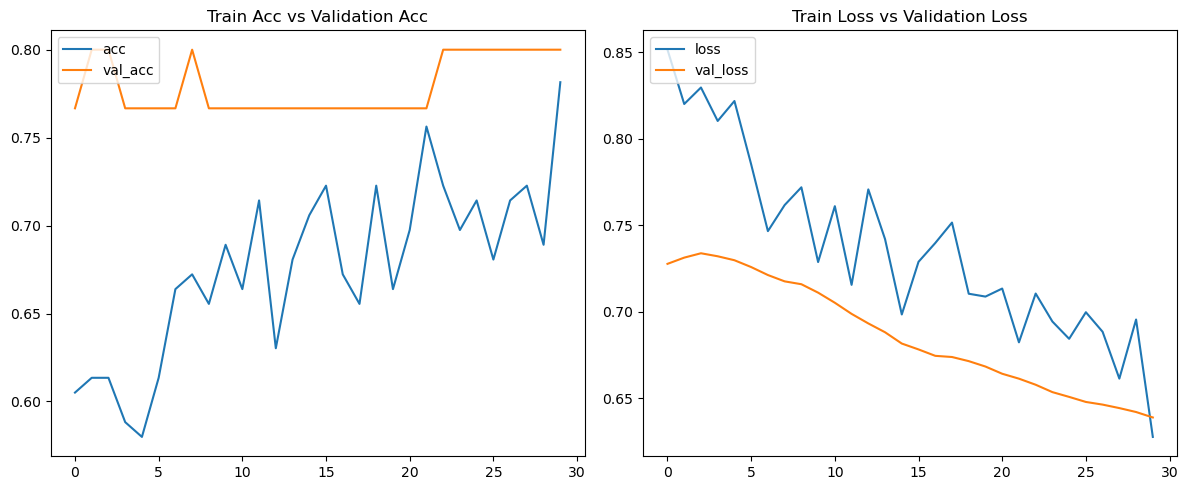

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(history.history["accuracy"])
axs[0].plot(history.history["val_accuracy"])
axs[0].set_title("Train Acc vs Validation Acc")
axs[0].legend(["acc", "val_acc"], loc="upper left")

axs[1].plot(history.history["loss"])
axs[1].plot(history.history["val_loss"])
axs[1].set_title("Train Loss vs Validation Loss")
axs[1].legend(["loss", "val_loss"], loc="upper left")

plt.tight_layout()
plt.show()

# Bayesian search

In [47]:
from keras import initializers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, PReLU, Input, Dropout, BatchNormalization, Activation
from keras.metrics import Precision, Recall



def objective(trial):
  model = Sequential()
  model.add(Input(shape=(10,)))
  num_layers = trial.suggest_int("num_layers", 1, 4)
  for i in range(num_layers):
        units = trial.suggest_int(f"units_l{i}", 4, 16)
        init_choice = trial.suggest_categorical(f"initializer_l{i}", ["glorot_normal", "he_normal", "glorot_uniform", "he_uniform"])
        reg_choice = trial.suggest_categorical(f"regularizer_l{i}", ["l1", "l2"])
        use_prelu = trial.suggest_categorical(f"use_prelu_l{i}", [True, False])

        initializer = getattr(initializers, init_choice)()
        regularizer = getattr(regularizers, reg_choice)(0.01)

        model.add(Dense(units=units, kernel_initializer=initializer, kernel_regularizer=regularizer))

        if use_prelu:
            model.add(PReLU())
            model.add(BatchNormalization())
            dropout_rate = trial.suggest_float(f"dropout_l{i}", 0.0, 0.5)
            model.add(Dropout(dropout_rate))
        else:
            activation = trial.suggest_categorical(f"activation_l{i}", ["relu", "sigmoid", "tanh"])
            model.add(Activation(activation))

  model.add(Dense(1, activation="sigmoid"))
  model.compile(optimizer=trial.suggest_categorical("optimizer", ["adam", "sgd", "adagrad"]),loss="binary_crossentropy",metrics=["accuracy", Precision(), Recall()])

  history = model.fit(x,y,epochs=30,batch_size=8,validation_split=0.2)
  return history.history['val_loss'][-1]


In [48]:
study = optuna.create_study(direction='minimize', sampler = optuna.samplers.TPESampler())
study.optimize(objective, n_trials=10)

[I 2025-05-22 00:05:05,583] A new study created in memory with name: no-name-73123f59-cfae-41ea-accd-220d3e46be42


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5662 - loss: 1.7547 - precision_48: 0.4563 - recall_48: 0.1698 - val_accuracy: 0.5667 - val_loss: 1.5822 - val_precision_48: 0.4762 - val_recall_48: 0.8333
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5697 - loss: 1.6248 - precision_48: 0.4080 - recall_48: 0.2393 - val_accuracy: 0.5667 - val_loss: 1.5607 - val_precision_48: 0.4615 - val_recall_48: 0.5000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5718 - loss: 1.5815 - precision_48: 0.4269 - recall_48: 0.2707 - val_accuracy: 0.6667 - val_loss: 1.5494 - val_precision_48: 0.6000 - val_recall_48: 0.5000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5883 - loss: 1.5807 - precision_48: 0.3970 - recall_48: 0.2006 - val_accuracy: 0.6667 - val_loss: 1.5449 - val_precision_48: 0.6250 - val_recall_48: 0.4167
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5817 - loss: 1.5902 - precision_48: 0.5089 - recall_48:

[I 2025-05-22 00:05:14,978] Trial 0 finished with value: 1.3918808698654175 and parameters: {'num_layers': 4, 'units_l0': 13, 'initializer_l0': 'he_normal', 'regularizer_l0': 'l1', 'use_prelu_l0': True, 'dropout_l0': 0.09459541551185868, 'units_l1': 8, 'initializer_l1': 'he_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.4608961246626029, 'units_l2': 6, 'initializer_l2': 'glorot_normal', 'regularizer_l2': 'l1', 'use_prelu_l2': True, 'dropout_l2': 0.4411901147860081, 'units_l3': 7, 'initializer_l3': 'glorot_normal', 'regularizer_l3': 'l2', 'use_prelu_l3': False, 'activation_l3': 'relu', 'optimizer': 'sgd'}. Best is trial 0 with value: 1.3918808698654175.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.5020 - loss: 1.1707 - precision_49: 0.4388 - recall_49: 0.4572 - val_accuracy: 0.5667 - val_loss: 1.1241 - val_precision_49: 0.0000e+00 - val_recall_49: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5376 - loss: 1.1254 - precision_49: 0.4843 - recall_49: 0.4682 - val_accuracy: 0.5333 - val_loss: 1.1228 - val_precision_49: 0.0000e+00 - val_recall_49: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5882 - loss: 1.1097 - precision_49: 0.5160 - recall_49: 0.5484 - val_accuracy: 0.5000 - val_loss: 1.1226 - val_precision_49: 0.0000e+00 - val_recall_49: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4206 - loss: 1.1773 - precision_49: 0.3315 - recall_49: 0.3440 - val_accuracy: 0.5000 - val_loss: 1.1230 - val_precision_49: 0.0000e+00 - val_recall_49: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6694 - loss: 1.0328

[I 2025-05-22 00:05:29,823] Trial 1 finished with value: 1.140956997871399 and parameters: {'num_layers': 2, 'units_l0': 10, 'initializer_l0': 'he_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'sigmoid', 'units_l1': 10, 'initializer_l1': 'he_normal', 'regularizer_l1': 'l2', 'use_prelu_l1': True, 'dropout_l1': 0.060488947461351694, 'optimizer': 'adagrad'}. Best is trial 1 with value: 1.140956997871399.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4497 - loss: 1.1337 - precision_50: 0.3066 - recall_50: 0.3712 - val_accuracy: 0.5667 - val_loss: 1.0398 - val_precision_50: 0.0000e+00 - val_recall_50: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4671 - loss: 1.0777 - precision_50: 0.3662 - recall_50: 0.5415 - val_accuracy: 0.5333 - val_loss: 1.0254 - val_precision_50: 0.2500 - val_recall_50: 0.0833
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5864 - loss: 1.0015 - precision_50: 0.5183 - recall_50: 0.5437 - val_accuracy: 0.5667 - val_loss: 1.0171 - val_precision_50: 0.4286 - val_recall_50: 0.2500
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5480 - loss: 1.0249 - precision_50: 0.4564 - recall_50: 0.3598 - val_accuracy: 0.5000 - val_loss: 1.0066 - val_precision_50: 0.3333 - val_recall_50: 0.2500
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6374 - loss: 0.9862 - precision_50: 0.6010 

[I 2025-05-22 00:05:39,532] Trial 2 finished with value: 0.846942663192749 and parameters: {'num_layers': 2, 'units_l0': 5, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l1', 'use_prelu_l0': True, 'dropout_l0': 0.21434963442835436, 'units_l1': 15, 'initializer_l1': 'glorot_uniform', 'regularizer_l1': 'l1', 'use_prelu_l1': False, 'activation_l1': 'tanh', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.846942663192749.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.3813 - loss: 1.2477 - precision_51: 0.3987 - recall_51: 0.8429 - val_accuracy: 0.4333 - val_loss: 1.2418 - val_precision_51: 0.4138 - val_recall_51: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4246 - loss: 1.2440 - precision_51: 0.4277 - recall_51: 0.8740 - val_accuracy: 0.4000 - val_loss: 1.2398 - val_precision_51: 0.3929 - val_recall_51: 0.9167
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3879 - loss: 1.2432 - precision_51: 0.3946 - recall_51: 0.8655 - val_accuracy: 0.4000 - val_loss: 1.2381 - val_precision_51: 0.3929 - val_recall_51: 0.9167
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3799 - loss: 1.2420 - precision_51: 0.3614 - recall_51: 0.8665 - val_accuracy: 0.4000 - val_loss: 1.2365 - val_precision_51: 0.3929 - val_recall_51: 0.9167
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3820 - loss: 1.2417 - precision_51: 0.3884 - recall

[I 2025-05-22 00:05:48,258] Trial 3 finished with value: 1.2123433351516724 and parameters: {'num_layers': 3, 'units_l0': 8, 'initializer_l0': 'he_uniform', 'regularizer_l0': 'l1', 'use_prelu_l0': False, 'activation_l0': 'sigmoid', 'units_l1': 5, 'initializer_l1': 'he_normal', 'regularizer_l1': 'l1', 'use_prelu_l1': False, 'activation_l1': 'relu', 'units_l2': 13, 'initializer_l2': 'glorot_uniform', 'regularizer_l2': 'l2', 'use_prelu_l2': False, 'activation_l2': 'relu', 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.846942663192749.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.3767 - loss: 1.4412 - precision_52: 0.3757 - recall_52: 0.9581 - val_accuracy: 0.4000 - val_loss: 1.3800 - val_precision_52: 0.3929 - val_recall_52: 0.9167
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4221 - loss: 1.2794 - precision_52: 0.3732 - recall_52: 0.9199 - val_accuracy: 0.3000 - val_loss: 1.2480 - val_precision_52: 0.2857 - val_recall_52: 0.5000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4725 - loss: 1.1286 - precision_52: 0.3675 - recall_52: 0.6168 - val_accuracy: 0.4000 - val_loss: 1.1635 - val_precision_52: 0.3333 - val_recall_52: 0.5000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5109 - loss: 1.0508 - precision_52: 0.4552 - recall_52: 0.4670 - val_accuracy: 0.4000 - val_loss: 1.1150 - val_precision_52: 0.2857 - val_recall_52: 0.3333
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6292 - loss: 0.9759 - precision_52: 0.5822 - recall

[I 2025-05-22 00:05:59,297] Trial 4 finished with value: 0.8099435567855835 and parameters: {'num_layers': 2, 'units_l0': 9, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'relu', 'units_l1': 8, 'initializer_l1': 'glorot_uniform', 'regularizer_l1': 'l1', 'use_prelu_l1': False, 'activation_l1': 'tanh', 'optimizer': 'adam'}. Best is trial 4 with value: 0.8099435567855835.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4029 - loss: 2.0067 - precision_53: 0.3681 - recall_53: 0.4323 - val_accuracy: 0.4667 - val_loss: 1.7212 - val_precision_53: 0.3333 - val_recall_53: 0.3333
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4164 - loss: 1.8483 - precision_53: 0.2655 - recall_53: 0.3866 - val_accuracy: 0.5333 - val_loss: 1.7173 - val_precision_53: 0.4286 - val_recall_53: 0.5000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4051 - loss: 1.8428 - precision_53: 0.2804 - recall_53: 0.3727 - val_accuracy: 0.5667 - val_loss: 1.7113 - val_precision_53: 0.4667 - val_recall_53: 0.5833
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4931 - loss: 1.7840 - precision_53: 0.4337 - recall_53: 0.4520 - val_accuracy: 0.6000 - val_loss: 1.7086 - val_precision_53: 0.5000 - val_recall_53: 0.6667
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5541 - loss: 1.7290 - precision_53: 0.4873 - recall

[I 2025-05-22 00:06:07,677] Trial 5 finished with value: 1.509490728378296 and parameters: {'num_layers': 4, 'units_l0': 12, 'initializer_l0': 'he_uniform', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'tanh', 'units_l1': 5, 'initializer_l1': 'he_normal', 'regularizer_l1': 'l1', 'use_prelu_l1': False, 'activation_l1': 'sigmoid', 'units_l2': 11, 'initializer_l2': 'he_normal', 'regularizer_l2': 'l1', 'use_prelu_l2': True, 'dropout_l2': 0.015983459793937727, 'units_l3': 6, 'initializer_l3': 'he_normal', 'regularizer_l3': 'l1', 'use_prelu_l3': True, 'dropout_l3': 0.11816341869129637, 'optimizer': 'sgd'}. Best is trial 4 with value: 0.8099435567855835.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4776 - loss: 1.5302 - precision_54: 0.4633 - recall_54: 0.9525 - val_accuracy: 0.4000 - val_loss: 1.6465 - val_precision_54: 0.4000 - val_recall_54: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4060 - loss: 1.5687 - precision_54: 0.3686 - recall_54: 0.7815 - val_accuracy: 0.4000 - val_loss: 1.5786 - val_precision_54: 0.4000 - val_recall_54: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6372 - loss: 1.4119 - precision_54: 0.5961 - recall_54: 0.9497 - val_accuracy: 0.3667 - val_loss: 1.5289 - val_precision_54: 0.3793 - val_recall_54: 0.9167
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5668 - loss: 1.4197 - precision_54: 0.4833 - recall_54: 0.8218 - val_accuracy: 0.3667 - val_loss: 1.4806 - val_precision_54: 0.3704 - val_recall_54: 0.8333
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6465 - loss: 1.3642 - precision_54: 0.5545 - recall_54:

[I 2025-05-22 00:06:15,047] Trial 6 finished with value: 1.0133968591690063 and parameters: {'num_layers': 2, 'units_l0': 7, 'initializer_l0': 'he_normal', 'regularizer_l0': 'l1', 'use_prelu_l0': True, 'dropout_l0': 0.026894049998129443, 'units_l1': 15, 'initializer_l1': 'he_uniform', 'regularizer_l1': 'l1', 'use_prelu_l1': False, 'activation_l1': 'sigmoid', 'optimizer': 'adam'}. Best is trial 4 with value: 0.8099435567855835.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3927 - loss: 0.9470 - precision_55: 0.3600 - recall_55: 0.5505 - val_accuracy: 0.4000 - val_loss: 0.8101 - val_precision_55: 0.3333 - val_recall_55: 0.5000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4955 - loss: 0.8842 - precision_55: 0.3184 - recall_55: 0.4211 - val_accuracy: 0.5000 - val_loss: 0.7823 - val_precision_55: 0.4000 - val_recall_55: 0.5000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5433 - loss: 0.8088 - precision_55: 0.4617 - recall_55: 0.5019 - val_accuracy: 0.6000 - val_loss: 0.7553 - val_precision_55: 0.5000 - val_recall_55: 0.5000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4911 - loss: 0.8199 - precision_55: 0.3735 - recall_55: 0.3973 - val_accuracy: 0.6333 - val_loss: 0.7358 - val_precision_55: 0.5455 - val_recall_55: 0.5000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5780 - loss: 0.7810 - precision_55: 0.4963 - recall_55

[I 2025-05-22 00:06:20,737] Trial 7 finished with value: 0.6352721452713013 and parameters: {'num_layers': 1, 'units_l0': 12, 'initializer_l0': 'glorot_uniform', 'regularizer_l0': 'l2', 'use_prelu_l0': False, 'activation_l0': 'tanh', 'optimizer': 'sgd'}. Best is trial 7 with value: 0.6352721452713013.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5441 - loss: 1.8163 - precision_56: 0.4205 - recall_56: 0.4575 - val_accuracy: 0.5000 - val_loss: 1.6287 - val_precision_56: 0.4348 - val_recall_56: 0.8333
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4586 - loss: 1.8212 - precision_56: 0.3454 - recall_56: 0.3700 - val_accuracy: 0.5000 - val_loss: 1.6139 - val_precision_56: 0.4348 - val_recall_56: 0.8333
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4994 - loss: 1.7651 - precision_56: 0.4178 - recall_56: 0.5591 - val_accuracy: 0.4667 - val_loss: 1.5995 - val_precision_56: 0.4000 - val_recall_56: 0.6667
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5243 - loss: 1.7302 - precision_56: 0.4185 - recall_56: 0.4221 - val_accuracy: 0.5667 - val_loss: 1.5935 - val_precision_56: 0.4706 - val_recall_56: 0.6667
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5439 - loss: 1.6679 - precision_56: 0.3601 - recall

[I 2025-05-22 00:06:33,031] Trial 8 finished with value: 1.3682533502578735 and parameters: {'num_layers': 4, 'units_l0': 13, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l2', 'use_prelu_l0': True, 'dropout_l0': 0.2378743805114193, 'units_l1': 13, 'initializer_l1': 'he_normal', 'regularizer_l1': 'l1', 'use_prelu_l1': False, 'activation_l1': 'tanh', 'units_l2': 11, 'initializer_l2': 'he_normal', 'regularizer_l2': 'l2', 'use_prelu_l2': False, 'activation_l2': 'relu', 'units_l3': 6, 'initializer_l3': 'he_normal', 'regularizer_l3': 'l2', 'use_prelu_l3': True, 'dropout_l3': 0.2463788918083245, 'optimizer': 'adam'}. Best is trial 7 with value: 0.6352721452713013.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.4588 - loss: 1.7241 - precision_57: 0.3695 - recall_57: 0.3977 - val_accuracy: 0.4333 - val_loss: 1.4808 - val_precision_57: 0.4138 - val_recall_57: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3910 - loss: 1.7334 - precision_57: 0.3847 - recall_57: 0.3474 - val_accuracy: 0.4333 - val_loss: 1.4384 - val_precision_57: 0.4000 - val_recall_57: 0.8333
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5151 - loss: 1.6234 - precision_57: 0.4409 - recall_57: 0.4470 - val_accuracy: 0.5667 - val_loss: 1.4133 - val_precision_57: 0.4706 - val_recall_57: 0.6667
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4143 - loss: 1.6262 - precision_57: 0.2684 - recall_57: 0.3586 - val_accuracy: 0.7000 - val_loss: 1.3930 - val_precision_57: 0.6364 - val_recall_57: 0.5833
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4178 - loss: 1.6705 - precision_57: 0.3173 - recall

[I 2025-05-22 00:06:42,352] Trial 9 finished with value: 1.547434687614441 and parameters: {'num_layers': 4, 'units_l0': 11, 'initializer_l0': 'glorot_normal', 'regularizer_l0': 'l1', 'use_prelu_l0': True, 'dropout_l0': 0.43874104468599956, 'units_l1': 6, 'initializer_l1': 'glorot_normal', 'regularizer_l1': 'l1', 'use_prelu_l1': True, 'dropout_l1': 0.38626827612487724, 'units_l2': 5, 'initializer_l2': 'glorot_normal', 'regularizer_l2': 'l1', 'use_prelu_l2': True, 'dropout_l2': 0.3267003015171336, 'units_l3': 6, 'initializer_l3': 'he_uniform', 'regularizer_l3': 'l1', 'use_prelu_l3': False, 'activation_l3': 'tanh', 'optimizer': 'adagrad'}. Best is trial 7 with value: 0.6352721452713013.


In [49]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_activation_l0,params_activation_l1,params_activation_l2,params_activation_l3,params_dropout_l0,...,params_regularizer_l3,params_units_l0,params_units_l1,params_units_l2,params_units_l3,params_use_prelu_l0,params_use_prelu_l1,params_use_prelu_l2,params_use_prelu_l3,state
0,0,1.391881,2025-05-22 00:05:05.591881,2025-05-22 00:05:14.977325,0 days 00:00:09.385444,NaN,NaN,NaN,relu,0.094595,...,l2,13,8.0,6.0,7.0,True,True,True,False,COMPLETE
1,1,1.140957,2025-05-22 00:05:14.979890,2025-05-22 00:05:29.822220,0 days 00:00:14.842330,sigmoid,NaN,NaN,NaN,NaN,...,NaN,10,10.0,NaN,NaN,False,True,NaN,NaN,COMPLETE
2,2,0.846943,2025-05-22 00:05:29.824863,2025-05-22 00:05:39.532155,0 days 00:00:09.707292,NaN,tanh,NaN,NaN,0.214350,...,NaN,5,15.0,NaN,NaN,True,False,NaN,NaN,COMPLETE
3,3,1.212343,2025-05-22 00:05:39.534688,2025-05-22 00:05:48.258104,0 days 00:00:08.723416,sigmoid,relu,relu,NaN,NaN,...,NaN,8,5.0,13.0,NaN,False,False,False,NaN,COMPLETE
4,4,0.809944,2025-05-22 00:05:48.261235,2025-05-22 00:05:59.297177,0 days 00:00:11.035942,relu,tanh,NaN,NaN,NaN,...,NaN,9,8.0,NaN,NaN,False,False,NaN,NaN,COMPLETE
5,5,1.509491,2025-05-22 00:05:59.298193,2025-05-22 00:06:07.676249,0 days 00:00:08.378056,tanh,sigmoid,NaN,NaN,NaN,...,l1,12,5.0,11.0,6.0,False,False,True,True,COMPLETE
6,6,1.013397,2025-05-22 00:06:07.678813,2025-05-22 00:06:15.047451,0 days 00:00:07.368638,NaN,sigmoid,NaN,NaN,0.026894,...,NaN,7,15.0,NaN,NaN,True,False,NaN,NaN,COMPLETE
7,7,0.635272,2025-05-22 00:06:15.048460,2025-05-22 00:06:20.737679,0 days 00:00:05.689219,tanh,NaN,NaN,NaN,NaN,...,NaN,12,NaN,NaN,NaN,False,NaN,NaN,NaN,COMPLETE
8,8,1.368253,2025-05-22 00:06:20.738697,2025-05-22 00:06:33.030885,0 days 00:00:12.292188,NaN,tanh,relu,NaN,0.237874,...,l2,13,13.0,11.0,6.0,True,False,False,True,COMPLETE
9,9,1.547435,2025-05-22 00:06:33.032922,2025-05-22 00:06:42.351124,0 days 00:00:09.318202,NaN,NaN,NaN,tanh,0.438741,...,l1,11,6.0,5.0,6.0,True,True,True,False,COMPLETE


In [50]:
study.best_params

{'num_layers': 1,
 'units_l0': 12,
 'initializer_l0': 'glorot_uniform',
 'regularizer_l0': 'l2',
 'use_prelu_l0': False,
 'activation_l0': 'tanh',
 'optimizer': 'sgd'}

In [52]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(10,)))

model.add(keras.layers.Dense(units=12, activation='tanh',kernel_initializer=keras.initializers.GlorotUniform(seed=42),
                             kernel_regularizer = keras.regularizers.L2()))

model.add(keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
history = model.fit(x, y, epochs=30, batch_size=8, validation_split=0.2)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4565 - loss: 0.8784 - precision_59: 0.4738 - recall_59: 0.6288 - val_accuracy: 0.3667 - val_loss: 0.9090 - val_precision_59: 0.3158 - val_recall_59: 0.5000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4572 - loss: 0.8301 - precision_59: 0.4348 - recall_59: 0.4886 - val_accuracy: 0.3667 - val_loss: 0.8831 - val_precision_59: 0.3158 - val_recall_59: 0.5000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4055 - loss: 0.8529 - precision_59: 0.3647 - recall_59: 0.4703 - val_accuracy: 0.4000 - val_loss: 0.8640 - val_precision_59: 0.3333 - val_recall_59: 0.5000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5171 - loss: 0.8127 - precision_59: 0.4231 - recall_59: 0.4692 - val_accuracy: 0.5333 - val_loss: 0.8495 - val_precision_59: 0.4286 - val_recall_59: 0.5000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5417 - loss: 0.8156 - precision_59: 0.4419 - recall_59:

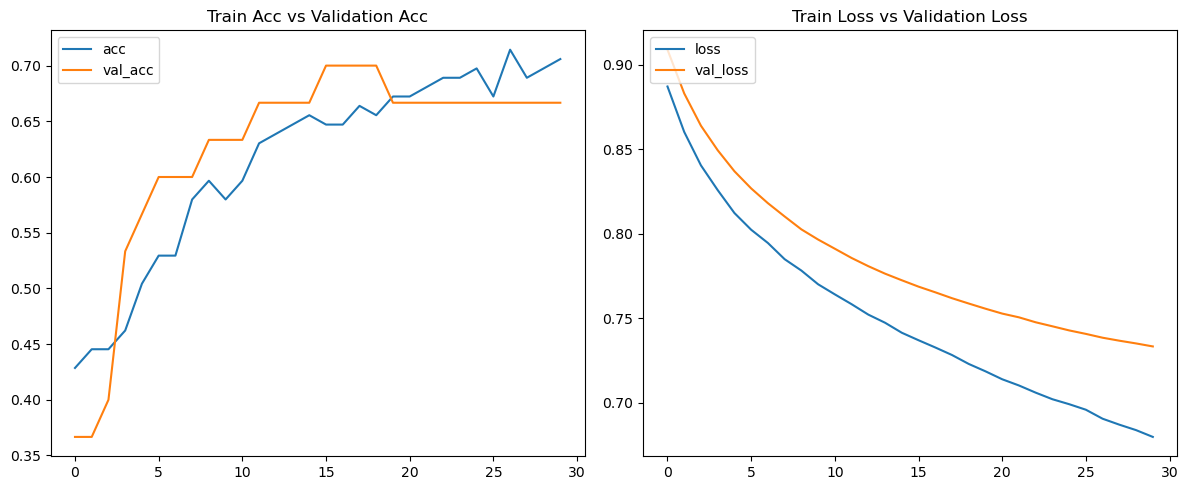

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(history.history["accuracy"])
axs[0].plot(history.history["val_accuracy"])
axs[0].set_title("Train Acc vs Validation Acc")
axs[0].legend(["acc", "val_acc"], loc="upper left")

axs[1].plot(history.history["loss"])
axs[1].plot(history.history["val_loss"])
axs[1].set_title("Train Loss vs Validation Loss")
axs[1].legend(["loss", "val_loss"], loc="upper left")

plt.tight_layout()
plt.show()